<a href="https://colab.research.google.com/github/pavi-1994/retail_customer_segmentation_capstone_project/blob/main/retail_customer_segmentation_capstone_project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


# **Project Name - Retail Customer Segmentation Capstone Project**

**Project Type** -**Unsupervised**

Contribution - Individual

Team Member 1 -Pavithra K

# **Project Summary -**
In this project, our goal is to identify major customer segments on a transnational data set which contains all the transactions occurring between 01/12/2010 and 09/12/2011 for a UK-based and registered non-store online retail.The company mainly sells unique all-occasion gifts. Many customers of the company are wholesalers.

First setp of project is to understand the Customer segmentation is the process of separating customers into groups on the basis of their shared behavior or other attributes. The groups should be homogeneous within themselves and should also be heterogeneous to each other.

Online retail dataset includes 541909 number of observations and 8 attributes. It includes following feature 'InvoiceNo', 'StockCode', 'Description', 'Quantity', 'InvoiceDate','UnitPrice', 'CustomerID', 'Country'. The dataset doesnot includs labeled feature hence its belongs to Unsupervised machine learning algorithm.

Next step is to Analysis of data and cleaning. In this dataset Customerid and Descriptions includes missing value. We dropped missing value which doesnot conatin customerid. and imputed null values of decription feature. The dataset had 5000+ number of duplicate values. we dropped them. We also dropped the observations that include stockcode less then 5digits and Invoiceno which includes "C".corrected and extracted date day week, month etc, from Invoicedate feature. created a new feature Total_amount Transaction.

During exploratory data analysis we used frequency table, barchart, pie chart, boxtplot and distplot. From this analysis,we observed that data set belongs to retail store of UK focuses mainly on UK.Contribution of customers other countries towards purchase of items online reatil store is much less. Purchase of items are high during september, October, November, and December This may be due to eve time and also, most of the purchase has done one monday,tuesday,wednesday. No one will purchase on Friday. There are different types of customers. some are customers may need based categories or buyers for only one time and they never come back, or new customers may be come back after period of time. there are customer they will choose the retail store as their first option.
  
   we used RFM model to understand the recency,frequency and monetary value based on which we performed clustering using KMean Algorithm and Hierarchical clustering . we understood there should be 4 types of clusters we named them as Platinum , Gold, Silver and Bronze badge customers.
 where Platinum Badge customers are more loyal and Bronze badge customers are one time purchaser  or we can say that need based customers. 

 Kmean Algorithm has gave clear cut idea using Elbow and Silhoutle_score method.

# **GitHub Link -**
https://github.com/pavi-1994/retail_customer_segmentation_capstone_project/blob/5999bb853c891154e8a4abc513acb8635754f5dc/retail_customer_segmentation_capstone_project.ipynb

## <b> # **Problem Statement** </b>

### In this project, our goal is to identify major customer segments on a transnational data set which contains all the transactions occurring between 01/12/2010 and 09/12/2011 for a UK-based and registered non-store online retail.The company mainly sells unique all-occasion gifts. Many customers of the company are wholesalers.

# ***Let's Begin !***

## **Customer Segmentation**

Customer segmentation is the process of separating customers into groups on the basis of their shared behavior or other attributes. The groups should be homogeneous within themselves and should also be heterogeneous to each other.

## **what is the need of customer segmentation?**

Segmentation allows marketers to better tailor their marketing efforts to various audience subsets. Those efforts can relate to both communications and product development. Specifically, segmentation helps a company:

1. Create and communicate targeted marketing messages that will resonate with specific groups of customers, but not with others (who will receive messages tailored to their needs and interests, instead).

2. Select the best communication channel for the segment, which might be email, social media posts, radio advertising, or another approach, depending on the segment.

3. Identify ways to improve products or new product or service opportunities.

4. Establish better customer relationships.

5. Test pricing options.

6. Focus on the most profitable customers.

7. Improve customer service.

8. Upsell and cross-sell other products and services.

In this process of segmentation, I am going to use the Online Retail Data Set, which was obtained from the almabetter capstone project. The data contains information about all the transactions for a UK-based and registered non-store online retail.
-----------------------------------------------------------------------------------------

## ***1. Know Your Data***
-------------------------------------------------------------------------------------
## Import Libraries

In [1]:
#importing required libraries
import pandas as pd
import numpy as np
# for visualization 
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

#preprocessing
from sklearn import preprocessing
#kmean clustering 
from sklearn.cluster import KMeans
#silhouette_Score
from sklearn.metrics import silhouette_samples, silhouette_score
# for hierarchial clustring
import scipy.cluster.hierarchy as sch
from sklearn.cluster import AgglomerativeClustering

from prettytable import PrettyTable # to create a table for conclusion of modle performance

### mounting drive

In [2]:
#mounting the drive
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


## Dataset Loading

In [3]:
#filepath
file_path="/content/drive/MyDrive/almabetter/module 4/capstone project_4/customer segmentation/Online Retail.xlsx - Online Retail.csv"

In [4]:
#loading data
customer_df=pd.read_csv(file_path)


### Dataset First View

In [5]:
## Dataset First Look of top five rows
customer_df.head(5)

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/10 8:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,12/1/10 8:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/10 8:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/10 8:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/10 8:26,3.39,17850.0,United Kingdom


In [6]:
## Dataset First Look of bottom 5 rows
customer_df.tail(5)

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
541904,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,12/9/11 12:50,0.85,12680.0,France
541905,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,12/9/11 12:50,2.10,12680.0,France
541906,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,12/9/11 12:50,4.15,12680.0,France
541907,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,12/9/11 12:50,4.15,12680.0,France
541908,581587,22138,BAKING SET 9 PIECE RETROSPOT,3,12/9/11 12:50,4.95,12680.0,France


### Dataset Rows & Columns count

In [7]:
# Dataset Rows & Columns count
print(f'shape of the customer_df {customer_df.shape}')

shape of the customer_df (541909, 8)


### creating copy of original dataset

In [8]:
#create a copy of dataframe
retail_customer_df=customer_df.copy()

### Dataset Information

In [9]:
# datatypes of features present in the dataframe
print(f'Feature datatype of customer_df :\n\n {customer_df.dtypes}')

Feature datatype of customer_df :

 InvoiceNo       object
StockCode       object
Description     object
Quantity         int64
InvoiceDate     object
UnitPrice      float64
CustomerID     float64
Country         object
dtype: object


In [10]:
# datframe information
customer_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   InvoiceNo    541909 non-null  object 
 1   StockCode    541909 non-null  object 
 2   Description  540455 non-null  object 
 3   Quantity     541909 non-null  int64  
 4   InvoiceDate  541909 non-null  object 
 5   UnitPrice    541909 non-null  float64
 6   CustomerID   406829 non-null  float64
 7   Country      541909 non-null  object 
dtypes: float64(2), int64(1), object(5)
memory usage: 33.1+ MB


## count of Missing Values

In [11]:
def missing_value_percent(df):
    ''' function receives dataframe as input
    prints the features with missing value and percentage of missing values'''
    
    print('Missing Data Count')
    print(df.isnull().sum().sort_values(ascending = False))

    print('--'*50)
    print('Missing Data Percentage')
    print(f'{round(df.isnull().sum().sort_values(ascending = False)/len(df)*100,2)}%')

In [12]:
#percentage of null value 
missing_value_percent(customer_df)

Missing Data Count
CustomerID     135080
Description      1454
InvoiceNo           0
StockCode           0
Quantity            0
InvoiceDate         0
UnitPrice           0
Country             0
dtype: int64
----------------------------------------------------------------------------------------------------
Missing Data Percentage
CustomerID     24.93
Description     0.27
InvoiceNo       0.00
StockCode       0.00
Quantity        0.00
InvoiceDate     0.00
UnitPrice       0.00
Country         0.00
dtype: float64%


In [13]:
customer_df[customer_df.Description.isnull()].head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
622,536414,22139,NaN,56,12/1/10 11:52,0.0,NaN,United Kingdom
1970,536545,21134,NaN,1,12/1/10 14:32,0.0,NaN,United Kingdom
1971,536546,22145,NaN,1,12/1/10 14:33,0.0,NaN,United Kingdom
1972,536547,37509,NaN,1,12/1/10 14:33,0.0,NaN,United Kingdom
1987,536549,85226A,NaN,1,12/1/10 14:34,0.0,NaN,United Kingdom


In [14]:
customer_df[customer_df.CustomerID.isnull()].head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
622,536414,22139,NaN,56,12/1/10 11:52,0.00,NaN,United Kingdom
1443,536544,21773,DECORATIVE ROSE BATHROOM BOTTLE,1,12/1/10 14:32,2.51,NaN,United Kingdom
1444,536544,21774,DECORATIVE CATS BATHROOM BOTTLE,2,12/1/10 14:32,2.51,NaN,United Kingdom
1445,536544,21786,POLKADOT RAIN HAT,4,12/1/10 14:32,0.85,NaN,United Kingdom
1446,536544,21787,RAIN PONCHO RETROSPOT,2,12/1/10 14:32,1.66,NaN,United Kingdom


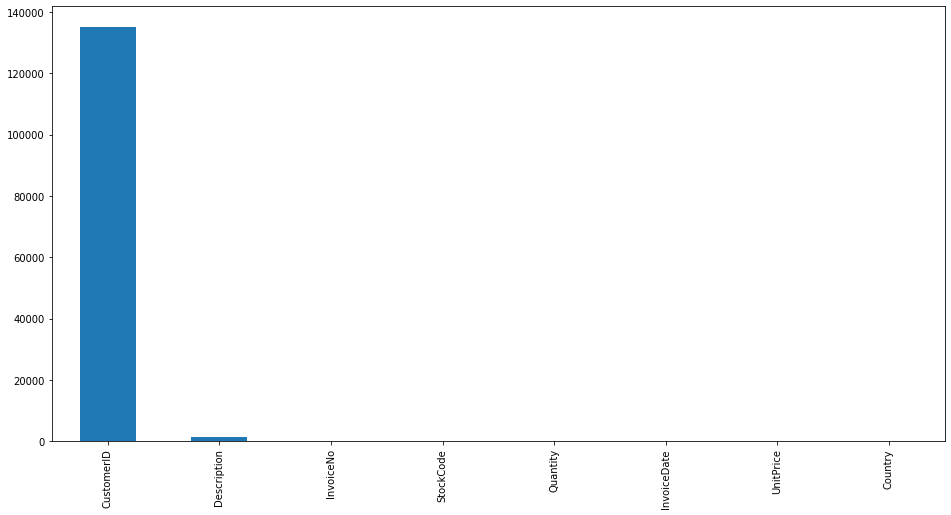

In [15]:
#plotting graph
plt.figure(figsize=(16,8))
customer_df.isnull().sum().sort_values(ascending=False).plot(kind="bar")

### count of duplicate values


In [16]:
# count of duplicate rows
print(f' Number of duplicated observation present in the dataset:{customer_df.duplicated().sum()}')

 Number of duplicated observation present in the dataset:5268


In [17]:
# duplicate observations
customer_df[customer_df.duplicated()].head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
517,536409,21866,UNION JACK FLAG LUGGAGE TAG,1,12/1/10 11:45,1.25,17908.0,United Kingdom
527,536409,22866,HAND WARMER SCOTTY DOG DESIGN,1,12/1/10 11:45,2.10,17908.0,United Kingdom
537,536409,22900,SET 2 TEA TOWELS I LOVE LONDON,1,12/1/10 11:45,2.95,17908.0,United Kingdom
539,536409,22111,SCOTTIE DOG HOT WATER BOTTLE,1,12/1/10 11:45,4.95,17908.0,United Kingdom
555,536412,22327,ROUND SNACK BOXES SET OF 4 SKULLS,1,12/1/10 11:49,2.95,17920.0,United Kingdom


## <b> Data Description </b>

### Online retail dataset includes 541909 number of observations and 8 attributes.

### <b>Attribute Information: </b>

* ### InvoiceNo: Invoice number. Nominal, a 6-digit integral number uniquely assigned to each transaction. If this code starts with letter 'c', it indicates a cancellation.
* ### StockCode: Product (item) code. Nominal, a 5-digit integral number uniquely assigned to each distinct product.
* ### Description: Product (item) name. Nominal.
* ### Quantity: The quantities of each product (item) per transaction. Numeric.
* ### InvoiceDate: Invice Date and time. Numeric, the day and time when each transaction was generated.
* ### UnitPrice: Unit price. Numeric, Product price per unit in sterling.
* ### CustomerID: Customer number. Nominal, a 5-digit integral number uniquely assigned to each customer.
* ### Country: Country name. Nominal, the name of the country where each customer resides.

### * InvoiceDate is also in object datatype  we need to convert it into datetime format

### * There are 24% of data of feature customer id and 0.27% of description features are missing. 
* It is better to drop all the missing data from the customer_df which is due to customer id.
* But we  need retain the missing values by imputing values due to "Description"

### * The dataset includes 5268 no. of duplicate rows we can drop these duplicate values from the dataset.

### Using describe function on dataframe


In [18]:
# Dataset Columns
print(f'Feature of customer_df :\n {customer_df.columns}')

Feature of customer_df :
 Index(['InvoiceNo', 'StockCode', 'Description', 'Quantity', 'InvoiceDate',
       'UnitPrice', 'CustomerID', 'Country'],
      dtype='object')


In [19]:
#using describe function and including all numerical as well as categorical feature
customer_df.describe().T

,count,mean,std,min,25%,50%,75%,max
Quantity,541909.0,9.552250,218.081158,-80995.00,1.00,3.00,10.00,80995.0
UnitPrice,541909.0,4.611114,96.759853,-11062.06,1.25,2.08,4.13,38970.0
CustomerID,406829.0,15287.690570,1713.600303,12346.00,13953.00,15152.00,16791.00,18287.0


 ### * The dataset include 8 features 'InvoiceNo', 'StockCode', 'Description', 'Quantity', 'InvoiceDate','UnitPrice', 'CustomerID', 'Country'.

### * we can infere from above analysis that Quantity and  UnitPrice  are skewed features. CustomerId is unique id of customers.

## Check Unique Values for each variable.

In [20]:
# check no of unique element present in each feature (columns)
customer_df.nunique()


InvoiceNo      25900
StockCode       4070
Description     4223
Quantity         722
InvoiceDate    23260
UnitPrice       1630
CustomerID      4372
Country           38
dtype: int64

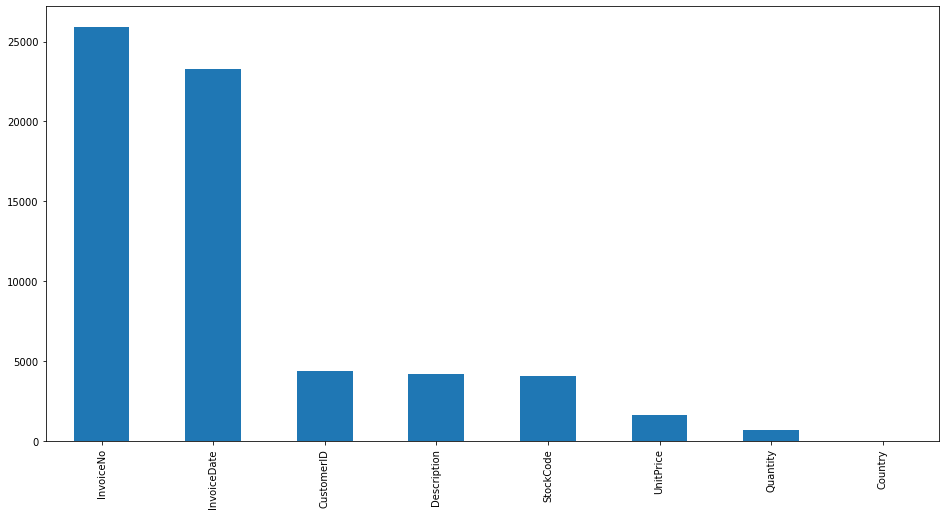

In [21]:
#plotting graph
plt.figure(figsize=(16,8))
customer_df.nunique().sort_values(ascending=False).plot(kind="bar")

## **Data wrangling**

### **Handling Missing Values**


### Drop all the missing data from the customer_df which is due to customer id.
### But we need retain the missing values by imputing values due to "Description". replace null vallue of description with unknown




### Dealing with missing values

In [22]:
#imputing missing value 
customer_df['Description'] =customer_df['Description'].fillna('Unknown')
#drop nan values
customer_df.dropna(inplace=True)
#checking for null value 
missing_value_percent(customer_df)

Missing Data Count
InvoiceNo      0
StockCode      0
Description    0
Quantity       0
InvoiceDate    0
UnitPrice      0
CustomerID     0
Country        0
dtype: int64
----------------------------------------------------------------------------------------------------
Missing Data Percentage
InvoiceNo      0.0
StockCode      0.0
Description    0.0
Quantity       0.0
InvoiceDate    0.0
UnitPrice      0.0
CustomerID     0.0
Country        0.0
dtype: float64%


### Dealing with duplicated rows

In [23]:
#drop duplicate rows
customer_df.drop_duplicates(inplace=True)
print(f'Shape of dataset after dealing with missing values and duplicated values{customer_df.shape}')

Shape of dataset after dealing with missing values and duplicated values(401604, 8)


### Droping the observations whose length of stock code less than 5

In [24]:
#count of observation whose length of stockcode less than 5
print("\n'StockCode' length less than 5\n")
print(((customer_df['StockCode'].str.len())<5).value_counts())

#droping the observation whose stockcode length < 5
customer_df=customer_df.drop(customer_df[(customer_df['StockCode'].str.len())<5].index)

print(f"\n after droping observations based on length of stockcode <5 is {customer_df.shape}")


'StockCode' length less than 5

False    399701
True       1903
Name: StockCode, dtype: int64

 after droping observations based on length of stockcode <5 is (399701, 8)


:### Drop rows which have InvoiceNo includes c in it

In [25]:
#value_count on InvoiceNo
customer_df["InvoiceNo"].value_counts()

576339     541
579196     532
580727     528
578270     441
573576     434
          ... 
573316       1
573322       1
553043       1
573327       1
C573541      1
Name: InvoiceNo, Length: 21799, dtype: int64

we can observe here that length of InvoiceNo greater than 6 means it starts with C. That means product which was cancelled. we will drop the  InvoiceNo whose length greater than 6

In [26]:
#'InvoiceNo' length less than 6
print("\n'InvoiceNo' length less than 6\n")
print(((customer_df['InvoiceNo'].str.len())<6).value_counts())

#'InvoiceNo' which include 'c'.
print("\n'InvoiceNo' have c value\n")
print((customer_df['InvoiceNo'].str.contains('C')).value_counts())


'InvoiceNo' length less than 6

False    399701
Name: InvoiceNo, dtype: int64

'InvoiceNo' have c value

False    391195
True       8506
Name: InvoiceNo, dtype: int64


In [27]:
#droping the observations 
customer_df=customer_df.drop(customer_df[(customer_df['InvoiceNo'].str.contains('C'))].index)
print(f"after droping observations based on InvoiceNo which include C in is {customer_df.shape}")

after droping observations based on InvoiceNo which include C in is (391195, 8)


#### Correcting feature format

In [28]:
##correcting feature format
customer_df['InvoiceDate'] = pd.to_datetime(customer_df['InvoiceDate'])

#creating new features from InvoiceDate extracting year, month,quater,week,weekday,day,dayofyear,time
customer_df['Year'] = customer_df['InvoiceDate'].dt.year
customer_df['Month'] = customer_df['InvoiceDate'].dt.month_name()
customer_df['Week'] = pd.DatetimeIndex(customer_df['InvoiceDate']).week
customer_df['Weekday'] = pd.DatetimeIndex(customer_df['InvoiceDate']).weekday
customer_df['Day'] = pd.DatetimeIndex(customer_df['InvoiceDate']).day
customer_df['hour'] = customer_df['InvoiceDate'].dt.hour
customer_df["minute"] = customer_df['InvoiceDate'].dt.minute

In [29]:
#  convert the customerid feature into int datatype
customer_df['CustomerID'] =(customer_df['CustomerID']).astype(int)

### What all manipulations have you done and insights you found?

## Dealing with missing values:
 * Dropped all the missing data from the customer_df which is due to customer id.
 * But we need retained the missing values that caused due to description by imputing null vallue of description with unknown

## Dealing with  Duplicate values:
 * droping all the rows which are duplicated 

### We have observed that the stock code is a 5 digitcode feature, but it  includes no of observation whose stockcode less 5 digits.
* we  Dropped the observations whose length of stock code less than 5     

###  Drop rows which have InvoiceNo includes c in it


### we corrected the feature formate of InvoiceDate and extracted day,month, year,week, weekday etc, as new features


##  Feature engineering 


In [30]:
# create a column'Total_Amount' by using Quantity and UnitPrice features( total_amount= quantity * unitprice)
customer_df['Total_Amount']=customer_df['Quantity'] * customer_df['UnitPrice']

In [31]:
customer_df.describe(include="all").T

,count,unique,top,freq,first,last,mean,std,min,25%,50%,75%,max
InvoiceNo,391195,18416,576339,541,NaT,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN
StockCode,391195,3660,85123A,2023,NaT,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Description,391195,3872,WHITE HANGING HEART T-LIGHT HOLDER,2016,NaT,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Quantity,391195.0,NaN,NaN,NaN,NaT,NaT,13.179292,181.904625,1.0,2.0,6.0,12.0,80995.0
InvoiceDate,391195,17179,2011-11-14 15:27:00,541,2010-12-01 08:26:00,2011-12-09 12:50:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN
UnitPrice,391195.0,NaN,NaN,NaN,NaT,NaT,2.874464,4.285058,0.0,1.25,1.95,3.75,649.5
CustomerID,391195.0,NaN,NaN,NaN,NaT,NaT,15295.072889,1710.349337,12346.0,13969.0,15158.0,16794.0,18287.0
Country,391195,37,United Kingdom,348904,NaT,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Year,391195.0,NaN,NaN,NaN,NaT,NaT,2010.934629,0.247181,2010.0,2011.0,2011.0,2011.0,2011.0
Month,391195,12,November,62951,NaT,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN




#### Created new feature Total_Amount using Quantity and UnitPrice

### Exploratory data analysis:

In [32]:
## visualization code:
def visualization_topmost (df,x):
      ''' the function recieves dataframe ad feature name a input 
      and returns topmost value counts and visualization done using batplot '''

      #value counts on feature
      print(f"{x} which have high transaction\n")
      #includes only top 10
      top_transaction=df[x].value_counts().iloc[0:5]
      print(top_transaction)
      print("\n")

      # features makes the high transactions
      sns.set_style('ticks')
      plt.figure(figsize=(18,5));
      pal = sns.light_palette("blue",n_colors=len(top_transaction))
      sns.barplot(x=top_transaction.index, y=top_transaction)#, palette=np.array(pal[::-1]))
      plt.title(f'{x} have  most transactions')
      plt.xticks(rotation=90)
      plt.show()
      

def visualization_bottom_most (df,x):
      ''' the function recieves dataframe ad feature name a input 
      and returns topmost value counts and visualization done using batplot '''

      #value counts on feature
      print(f"{x} which have low transaction\n")
      #includes only  bottom 10
      low_transaction=df[x].value_counts().iloc[-5:]
      print(low_transaction)
      print("\n")

      # features makes the high transactions
      sns.set_style('ticks')
      plt.figure(figsize=(18,5));
      pal = sns.light_palette("blue",n_colors=len(low_transaction))
      sns.barplot(x=low_transaction.index, y=low_transaction)#, palette=np.array(pal[::-1]))
      plt.title(f'{x} have the most transactions')
      plt.xticks(rotation=90)
      plt.show() 

def visualize_descrete_feature(df,feature):

    '''function takes feature name as input and 
    prints the output of features value_count , visualize using pie plot and countplot'''
    print(f'value_count of {feature}')
    print(df[feature].value_counts())

    print("\n\n")
    
    # Visualize feature
    #using subplot
    f,ax=plt.subplots(1,2,figsize=(16,8))
    #visualization through pie plot
    df[feature].value_counts().plot.pie(autopct='%1.1f%%',ax=ax[0],shadow=True)
    ax[0].set_title(feature)
    
    #using countplot
    sns.countplot(feature,data=df,ax=ax[1])
    ax[1].set_title(feature)
    plt.show()


#### * we have used value count to count the frequency of occurance of that feature values in dataset. 
#### * we used bar charts because bar charts  are used to draw comparisons of  data using these bars


**Which Country makes the most transactions?**

Country which have high transaction

United Kingdom    348904
Germany             8644
France              8019
EIRE                7128
Spain               2418
Name: Country, dtype: int64




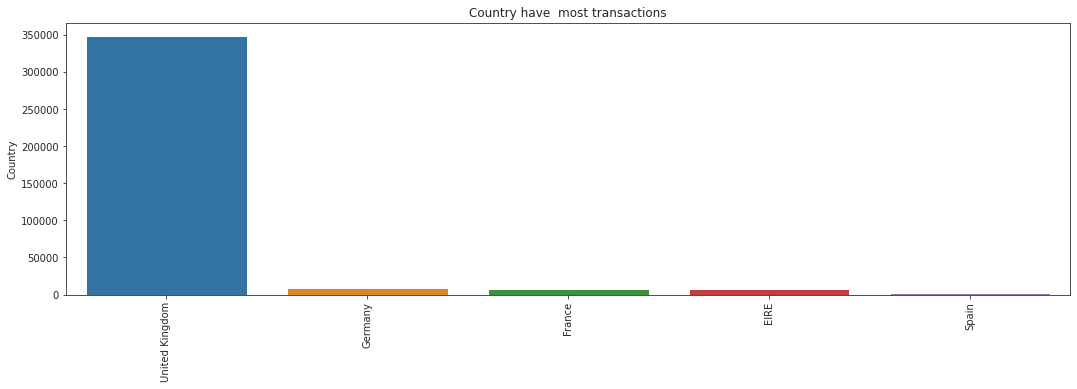

In [33]:
visualization_topmost(customer_df,"Country")

In [34]:
print("Countries which makes high transactions are :"+ str(customer_df['Country'].value_counts()[:5].index))

Countries which makes high transactions are :Index(['United Kingdom', 'Germany', 'France', 'EIRE', 'Spain'], dtype='object')


### **countries which make least transaction:**

Country which have low transaction

Lithuania         35
Brazil            32
Czech Republic    24
Bahrain           17
Saudi Arabia       9
Name: Country, dtype: int64




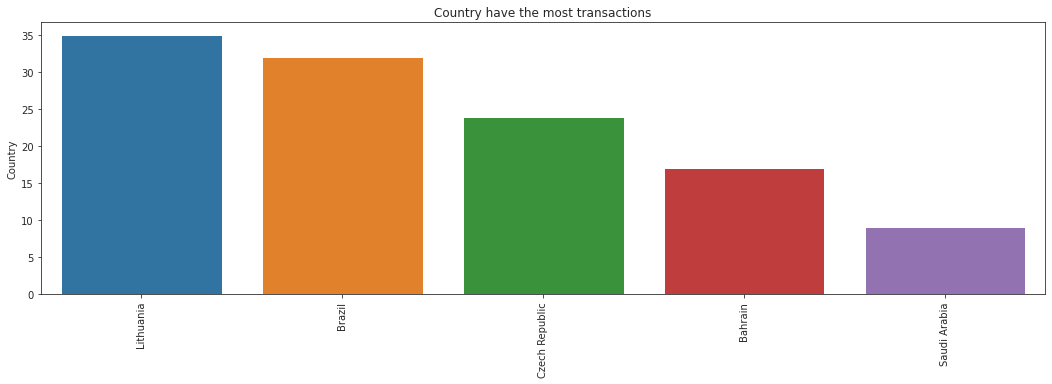

In [35]:
visualization_bottom_most(customer_df,"Country")

In [36]:
print("Countries which makes low transactions are :"+ str(customer_df['Country'].value_counts()[-5:].index))

Countries which makes low transactions are :Index(['Lithuania', 'Brazil', 'Czech Republic', 'Bahrain', 'Saudi Arabia'], dtype='object')


#### This  visualization help us draw a colourfull insight about transaction based on countries i.e, 
      * United Kingdom is the topmost country 
      * saudi Arabia is the one which makes very low transaction

### stock code which are high on demand





StockCode which have high transaction

85123A    2023
22423     1714
85099B    1615
84879     1395
47566     1390
Name: StockCode, dtype: int64




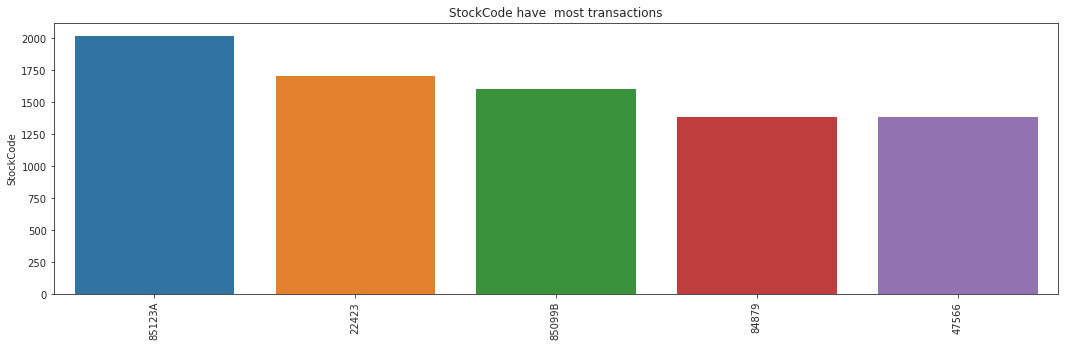

In [37]:
visualization_topmost(customer_df,"StockCode")

In [38]:
print("most popular product based on stockcode few of them listed here:"+ str(customer_df['StockCode'].value_counts()[:5].index))

most popular product based on stockcode few of them listed here:Index(['85123A', '22423', '85099B', '84879', '47566'], dtype='object')


### stock code which are on less demand

StockCode which have low transaction

90168     1
90169     1
90202A    1
90118     1
23843     1
Name: StockCode, dtype: int64




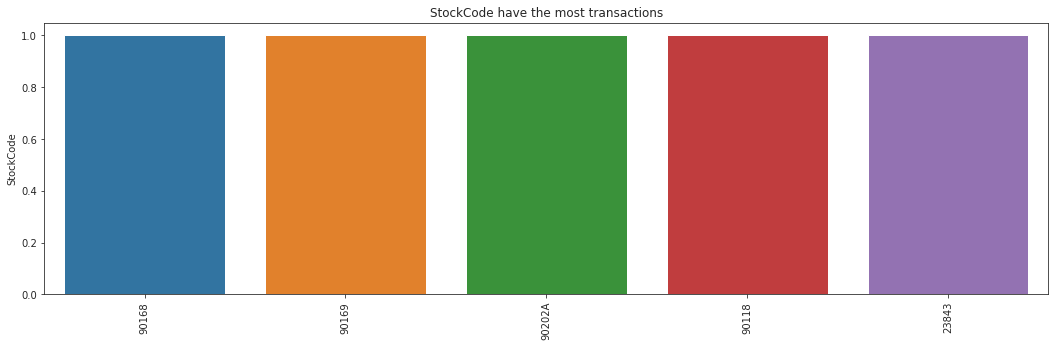

In [39]:
visualization_bottom_most(customer_df,"StockCode")

In [40]:
print("less popular product based on stockcodefew of them listed here:"+ str(customer_df['StockCode'].value_counts()[-5:].index))

less popular product based on stockcodefew of them listed here:Index(['90168', '90169', '90202A', '90118', '23843'], dtype='object')


### based on stockcode i.e, 
      * most popular product based on stockcode few of them listed here['85123A', '22423', '85099B', '84879', '47566']
      * less popular product based on stockcodefew of them listed here['90168', '90169', '90202A', '90118', '23843']

## Popularity based on "Description" of items:
### Which one is most popular? 

Description which have high transaction

WHITE HANGING HEART T-LIGHT HOLDER    2016
REGENCY CAKESTAND 3 TIER              1714
JUMBO BAG RED RETROSPOT               1615
ASSORTED COLOUR BIRD ORNAMENT         1395
PARTY BUNTING                         1390
Name: Description, dtype: int64




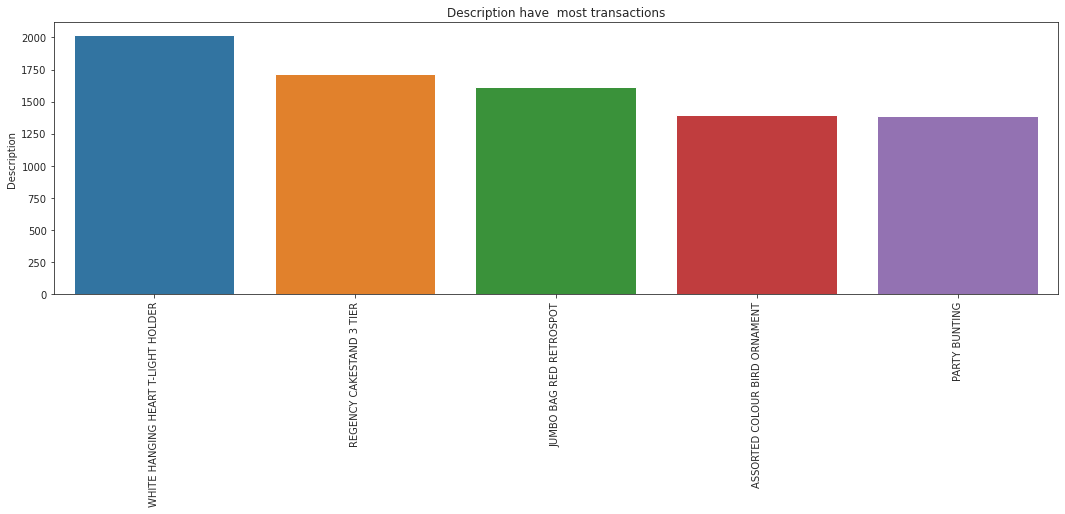

In [41]:
visualization_topmost(customer_df,"Description")

In [42]:
print("most popular product few of them listed here:"+ str(customer_df['Description'].value_counts()[:5].index))

most popular product few of them listed here:Index(['WHITE HANGING HEART T-LIGHT HOLDER', 'REGENCY CAKESTAND 3 TIER',
       'JUMBO BAG RED RETROSPOT', 'ASSORTED COLOUR BIRD ORNAMENT',
       'PARTY BUNTING'],
      dtype='object')


Description which have low transaction

DIAMANTE NECKLACE                      1
SCALLOP SHELL SOAP DISH                1
BLUE FELT HANGING HEART WITH FLOWER    1
NECKLACE+BRACELET SET PINK DAISY       1
PAPER CRAFT , LITTLE BIRDIE            1
Name: Description, dtype: int64




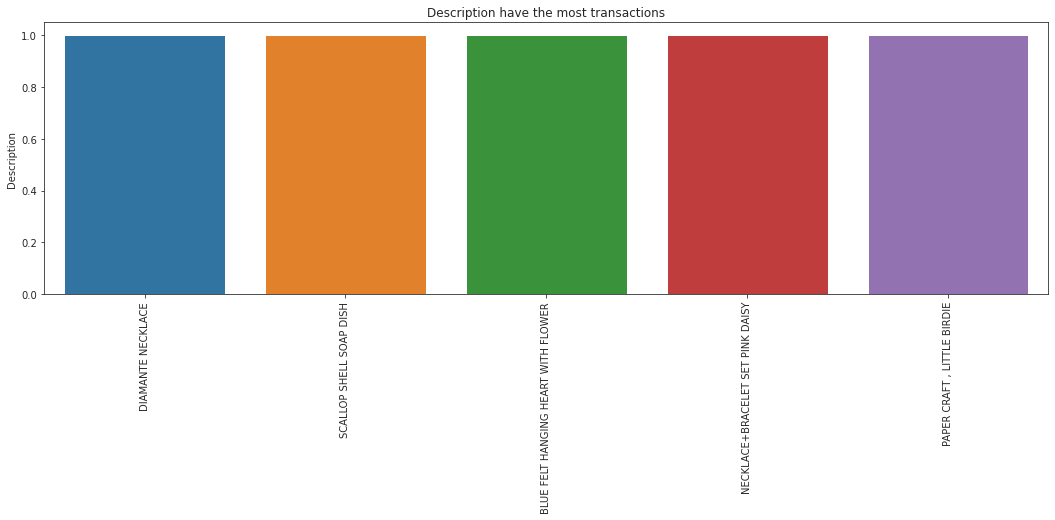

In [43]:
visualization_bottom_most(customer_df,"Description")

In [44]:
print("less popular product few of them listed here:"+ str(customer_df['Description'].value_counts()[-5:].index))

less popular product few of them listed here:Index(['DIAMANTE NECKLACE', 'SCALLOP SHELL SOAP DISH',
       'BLUE FELT HANGING HEART WITH FLOWER',
       'NECKLACE+BRACELET SET PINK DAISY', 'PAPER CRAFT , LITTLE BIRDIE'],
      dtype='object')


### Based on Popularity of Descriptions:
     * most popular product few of them listed here:['WHITE HANGING HEART T-LIGHT HOLDER', 'REGENCY CAKESTAND 3 TIER','JUMBO BAG RED RETROSPOT','ASSORTED COLOUR BIRD ORNAMENT','PARTY BUNTING']
     * less popular product few of them listed here ['DIAMANTE NECKLACE','SCALLOP SHELL SOAP DISH','BLUE FELT HANGING HEART WITH FLOWER','NECKLACE+BRACELET SET PINK DAISY', 'PAPER CRAFT , LITTLE BIRDIE']

**From this analysis we can observe that there are products which have given more than 1000 descriptions also there are products which have only one description**

#### check the loyal of customer based on 

In [45]:
no_of_unique_customers=len(list(customer_df["CustomerID"].unique()))
print(f'There are {no_of_unique_customers} of unique customers are present')

There are 4336 of unique customers are present


### **Top customers**

CustomerID which have high transaction

17841    7667
14911    5586
14096    5095
12748    4397
14606    2675
Name: CustomerID, dtype: int64




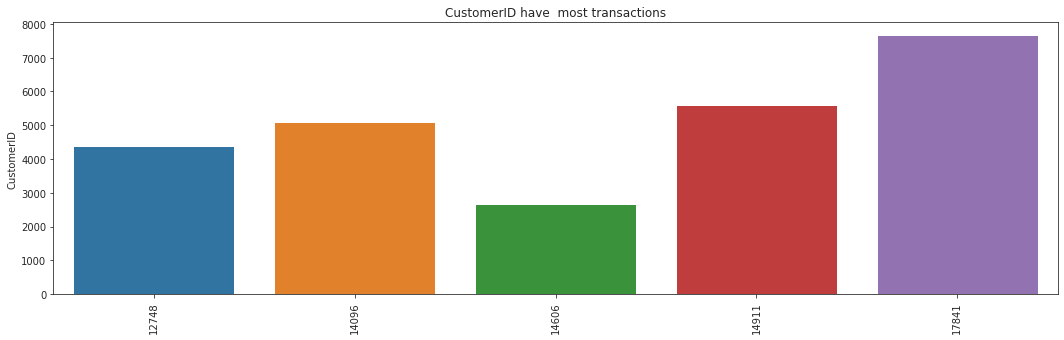

In [46]:
visualization_topmost(customer_df,"CustomerID")

In [47]:
print("Regular customer are :"+str(customer_df['CustomerID'].value_counts()[:5].index))

Regular customer are :Int64Index([17841, 14911, 14096, 12748, 14606], dtype='int64')


CustomerID which have low transaction

12603    1
18184    1
15313    1
17347    1
13270    1
Name: CustomerID, dtype: int64




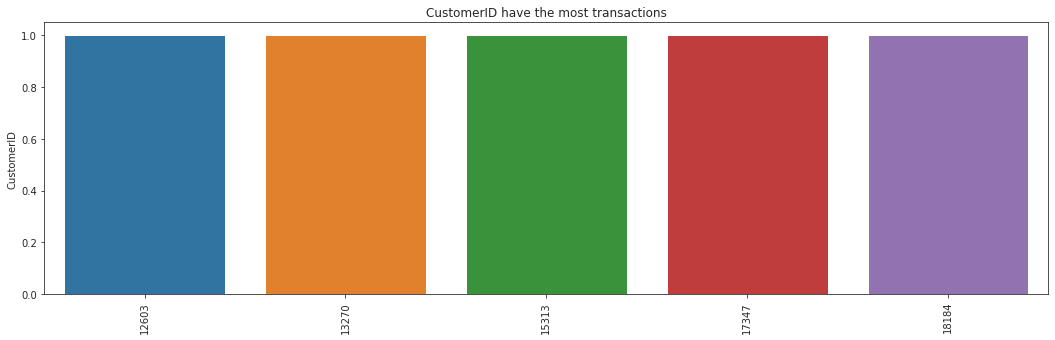

In [48]:
visualization_bottom_most(customer_df,"CustomerID")

In [49]:
print("Customer who are not a frequently :"+ str(customer_df['CustomerID'].value_counts()[-5:].index))

Customer who are not a frequently :Int64Index([12603, 18184, 15313, 17347, 13270], dtype='int64')


###Regular or not regular customer:
* top customer who buy frequently are Regular customer[17841, 14911, 14096, 12748, 14606]
*irregular customers few of the listed here [12603, 18184, 15313, 17347, 13270]


### customers who buy large quantities

In [50]:
customer_df.groupby(["CustomerID","StockCode"])["Quantity"].sum().reset_index(name='sum').sort_values(['sum'], ascending=False).head()

,CustomerID,StockCode,sum
185342,16446,23843,80995
0,12346,23166,74215
42143,13256,84826,12540
253809,17949,22197,11692
184264,16422,17003,10080


here we can see that customerid, we can assume them as whole sellers

1.   customerid 16446 has ordered stock code in a large quantity 80995units
2.   customerid 12346	 has order stockcode 23166 in large quantity 74215
3.   customerid 13256	 has order stockcode	84826 in large quantity	12540

### There  few customers who were not wholesellers as listed below:

In [51]:
customer_df.groupby(["CustomerID","StockCode"])["Quantity"].sum().reset_index(name='sum').sort_values(['sum'], ascending=False).tail()

,CustomerID,StockCode,sum
198799,16764,22385,1
198800,16764,22386,1
198805,16764,22427,1
66167,13869,22430,1
142192,15460,85049E,1


### These customers may need based categories or buyers for only one time and they never come back, or new customers may be come back after period of time.

## Customer observation based on spending

In [52]:
spending_of_customer=customer_df.groupby("CustomerID").agg({"InvoiceNo" : "nunique","Total_Amount" : 'sum'}).sort_values(by=['InvoiceNo', 'Total_Amount'], ascending=[False, True])
spending_of_customer.head()

,InvoiceNo,Total_Amount
CustomerID,,
12748,206,31650.78
14911,198,136161.83
17841,124,40495.99
13089,97,58762.08
14606,91,11941.15


Text(0.5, 1.0, 'Customers who buy often, but spend large amount')

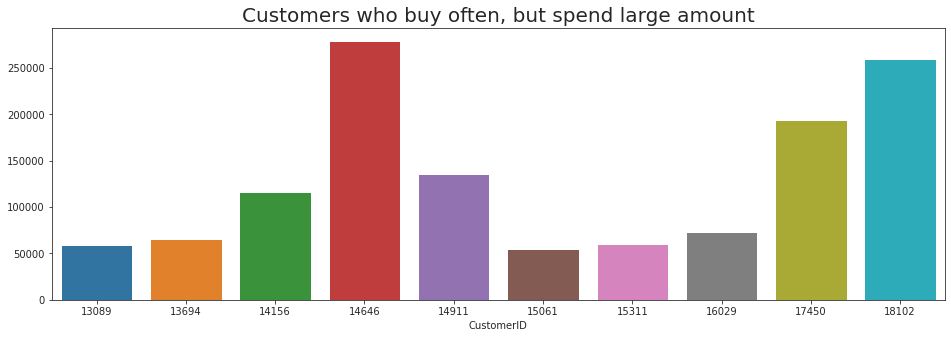

In [53]:
# Considering 10,000 is less payment from spending_of_customer
frequent_but_less_spending = spending_of_customer[spending_of_customer['Total_Amount'] > 50000]
frequent_but_less_spending.head(10)

#plotting graph
plt.figure(figsize=(16,5))
sns.barplot(frequent_but_less_spending['Total_Amount'][:10].index,
            frequent_but_less_spending['Total_Amount'][:10].values)
plt.title("Customers who buy often, but spend large amount", fontsize = 20)

### 14646 ,17450,18102 are the customer who spend large amount 

Text(0.5, 1.0, 'Customers who buy often, but spent little')

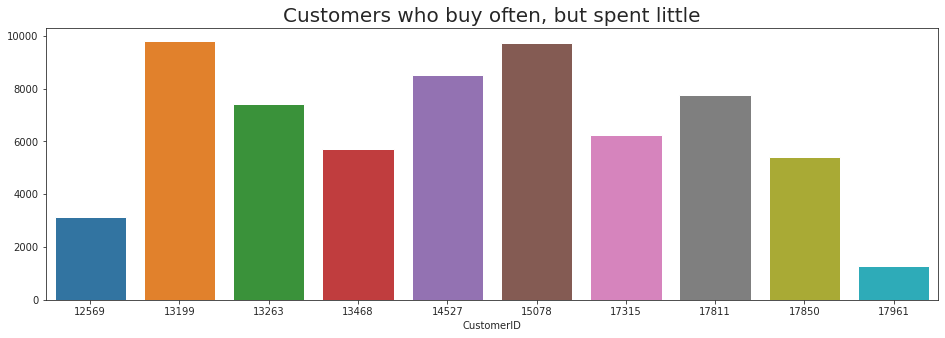

In [54]:
# Considering 10,000 is less payment from spending_of_customer
frequent_but_less_spending = spending_of_customer[spending_of_customer['Total_Amount'] < 10000]
frequent_but_less_spending.head(10)

#plotting graph
plt.figure(figsize=(16,5))
sns.barplot(frequent_but_less_spending['Total_Amount'][:10].index,
            frequent_but_less_spending['Total_Amount'][:10].values)
plt.title("Customers who buy often, but spent little", fontsize = 20)

these are the goup of customer who frequently buy items but spent little 13199,15978 are top most sender in this group

## visualization of continuous features:

In [55]:
def visualize_continuous_feature(feature_name):
   
    print(f'In UnitPrice feature no.of unique values present is : {customer_df[feature_name].nunique()}')
    print("\n")
    print(customer_df[feature_name].value_counts().head(10))
    print("\n")
    print(customer_df[feature_name].value_counts().tail(10))
    
    # set a grey background (use sns.set_theme() if seaborn version 0.11.0 or above) 
    sns.set(style="darkgrid")
    
    # creating a figure composed of two matplotlib.Axes objects (ax_box and ax_hist)
    f, (ax_box, ax_hist) = plt.subplots(2, sharex=True, gridspec_kw={"height_ratios": (.15, .85)})
    
    # assigning a graph to each ax
    sns.boxplot(customer_df[feature_name], ax=ax_box)
    sns.distplot(customer_df[feature_name], ax=ax_hist)



Here we used boxpot and distplot for visualizing the distribution of each continuous value. By using this plot we can
* check how data are distributed.
* distribution of data below  and above mean value
* prescence of outlier or we can say that skewness of the feature

In UnitPrice feature no.of unique values present is : 357


1.25    45081
1.65    36277
2.95    26146
0.85    25639
0.42    21543
4.95    17910
3.75    17438
2.10    16884
2.08    15565
1.95    12512
Name: UnitPrice, dtype: int64


1.60      1
2.85      1
9.42      1
175.00    1
4.86      1
3.98      1
6.78      1
1.02      1
12.00     1
12.95     1
Name: UnitPrice, dtype: int64


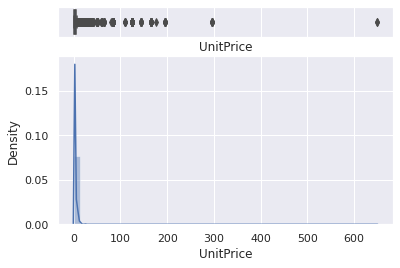

In [56]:
#visualize distribution of feature using box and distplot
visualize_continuous_feature("UnitPrice")

### We can observe here that products with lower unitprice has bought in larger quantity. than higher unitprice. this feature is highly right skewed.

In UnitPrice feature no.of unique values present is : 300


1     68966
12    59813
2     57099
6     37423
4     31980
3     26607
24    23692
10    21156
8     11565
5      8038
Name: Quantity, dtype: int64


660      1
1515     1
323      1
1600     1
98       1
4300     1
608      1
552      1
906      1
80995    1
Name: Quantity, dtype: int64


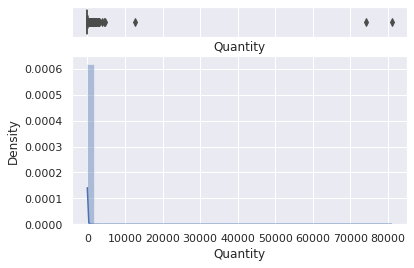

In [57]:
#visualize distribution of feature using box and distplot
visualize_continuous_feature("Quantity")

### we can see from above visualization 
1. items which are bought in large quantity  are less frequent
2. items which are bought in single unit is highly frequent

or we can say that whole seller customers buy once  in a year or quaterly basis.

In UnitPrice feature no.of unique values present is : 2857


15.00    19974
17.70     9156
16.50     8470
10.20     8009
19.80     7608
1.25      7055
3.75      6629
10.50     5528
20.80     5510
1.65      5359
Name: Total_Amount, dtype: int64


7.35       1
537.90     1
481.50     1
1226.40    1
597.60     1
27.60      1
24.38      1
1305.60    1
277.92     1
66.36      1
Name: Total_Amount, dtype: int64


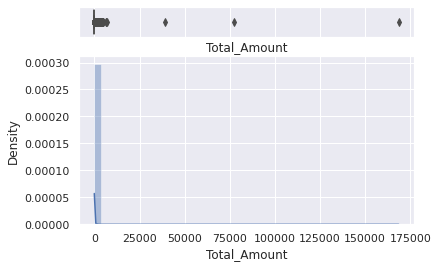

In [58]:
#visualize distribution of feature using box and distplot
visualize_continuous_feature("Total_Amount")

### As product becomes costlier total money spent to buy is less. or we can say preference to buy product decreases as product becomes costlier 

### Year

In [59]:
#unique items
customer_df["Year"].unique()

array([2010, 2011])

In [60]:
#groupby function with aggregating using sum
customer_df.groupby("Year")["Total_Amount"].sum()

Year
2010     565214.560
2011    8172178.081
Name: Total_Amount, dtype: float64

Total amount of purchase  done by customers  in one month of 2010 is 565214.560.

where as the total purchase done by customers in 11 months of 2011 is 8172178.081


##Month

In [61]:
#aggregate over no of column using groupby function
customer_df.groupby("Month").aggregate({'Quantity':'sum','Total_Amount':'sum'}).sort_values("Total_Amount",ascending=False)

,Quantity,Total_Amount
Month,,
November,674381,1136564.000
December,596470,1077457.640
October,590183,1002356.560
September,542828,938782.631
May,372673,659257.490
June,362725,653264.920
August,397915,635514.380
July,367065,591603.790
March,347284,583143.850


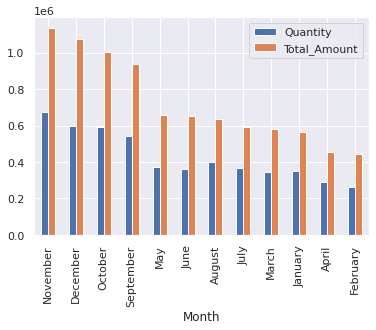

In [62]:
#aggregate over no of column using groupby function and visualize
customer_df.groupby("Month").aggregate({'Quantity':'sum','Total_Amount':'sum'}).sort_values("Total_Amount",ascending=False).plot(kind="bar")


### we observed that purchase is high during month september,october,november,december in other month the purchase done buy customers is average 

## Weekday

In [63]:
#aggregate over no of column using groupby function
customer_df.groupby("Weekday").aggregate({"Weekday":"count",'Quantity':'sum','Total_Amount':'mean'})

,Weekday,Quantity,Total_Amount
Weekday,,,
0,63972,764940,20.736580
1,65495,1002944,25.536653
2,67774,957866,23.010288
3,78921,1148335,24.572153
4,53948,821069,27.059614
6,61085,460519,12.764816


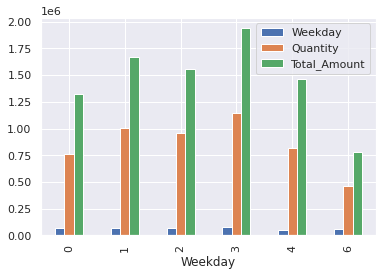

In [64]:
#aggregate over no of column using groupby function and visualize it
customer_df.groupby("Weekday").aggregate({"Weekday":"count",'Quantity':'sum','Total_Amount':'sum'}).plot(kind="bar")

1. we have observed that most of the purchase has done one monday,tuesday,wednesday.

2. no purchase done on friday

3. on saturday less item bought by customer in comparison with other days


##hour


In [65]:
#use value_count to check frequency 
customer_df["hour"].value_counts()

12    70721
13    62804
14    53065
11    48216
15    44620
10    37559
16    23630
9     21787
17    12900
8      8625
19     3230
18     2885
20      777
7       375
6         1
Name: hour, dtype: int64

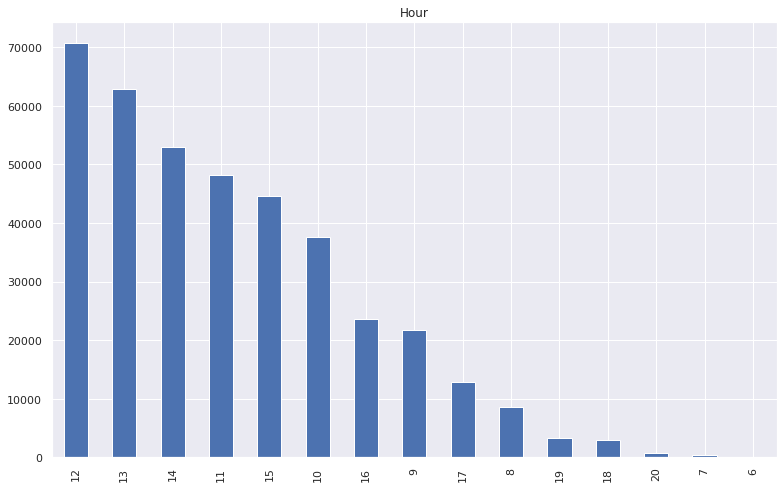

In [66]:
plt.figure(figsize=(13,8))
plt.title('Hour')
customer_df["hour"].value_counts().plot(kind="bar")

In [67]:
##binning hour feature to shift_timings
customer_df['time_shift'] = customer_df['hour'].apply(lambda x: 'morning' if 6<=x<=10 else ('day' if 10<=x<=16 else ('evening' if 17<=x<=19 else 'night')))

value_count of time_shift
day        303056
morning     68347
evening     19015
night         777
Name: time_shift, dtype: int64





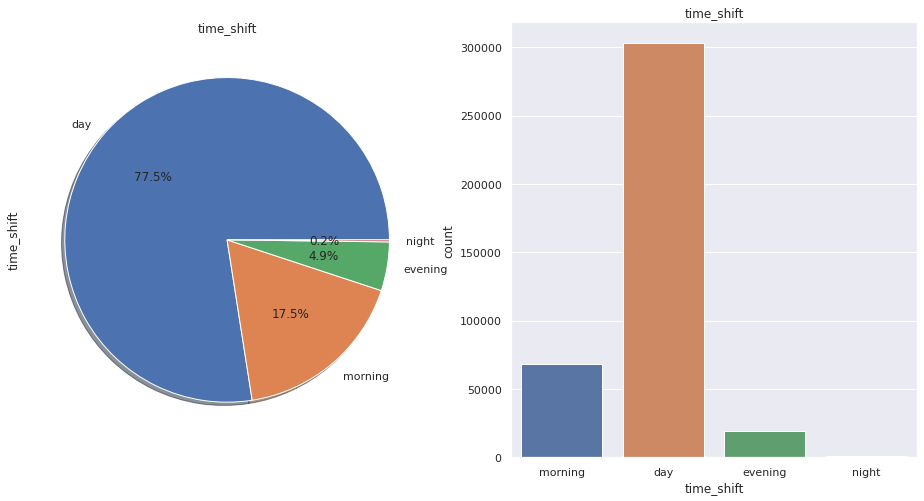

In [68]:
#visualization using pie chart and countplot
visualize_descrete_feature(customer_df,"time_shift")

### we can infere from above analysis of pie chart that is percentage of transaction is high during day i.e, around 77.5% in caomparision withother time and very low during night duration.0.2%

## ** Feature Engineering **

## **RFM**

RFM stands for Recency, Frequency, and Monetary. RFM analysis is a commonly used technique to generate and assign a score to each customer based on how recent their last transaction was (Recency), how many transactions they have made in the last year (Frequency), and what the monetary value of their transaction was (Monetary).

RFM analysis helps to answer the following questions: Who was our most recent customer? How many times has he purchased items from our shop? And what is the total value of his trade? All this information can be critical to understanding how good or bad a customer is to the company.

1.**Recency**: earliest Invoice Date – First Purchase Date

¡    Number of days since a customer made the last purchase

ii.  Or last visit day or the last login time

iii. Lower the better


2.**frequency**:  Number of Invoices grouped by Customer ID

i.  The number of purchases made in a given period

ii  How often a customer use our products/services

¡ii Higher the better




3.**Monetory**:Total_Amount( Unit Price * Quantity) grouped by Customer ID

i.Total amount of money a customer spent in a given period

ii.Useful for recognizing opportunities to upsell

iii.¡ Higher the better



In [69]:
#Recency = Latest Date - Last Inovice Data, Frequency = count of invoice no. of transaction(s), Monetary = Sum of Total 
#Amount for each customer
import datetime as dt

#Set Latest date 2011-12-10 as last invoice date was 2011-12-09. This is to calculate the number of days from recent purchase
Latest_Date = dt.datetime(2011,12,10)

#Create RFM Modelling scores for each customer
rfm_df = customer_df.groupby('CustomerID').agg({'InvoiceDate': lambda x: (Latest_Date - x.max()).days, 'InvoiceNo': lambda x: len(x), 'Total_Amount': lambda x: x.sum()})

#Convert Invoice Date into type int
rfm_df['InvoiceDate'] = rfm_df['InvoiceDate'].astype(int)

#Rename column names to Recency, Frequency and Monetary
rfm_df.rename(columns={'InvoiceDate': 'Recency', 
                         'InvoiceNo': 'Frequency', 
                         'Total_Amount': 'Monetary'}, inplace=True)

rfm_df.reset_index().head()

,CustomerID,Recency,Frequency,Monetary
0,12346,325,1,77183.60
1,12347,2,182,4310.00
2,12348,75,27,1437.24
3,12349,18,72,1457.55
4,12350,310,16,294.40


#### we observed from  above that customer with customerid 12346  purchase 325 days ago but spent high amount. 

 ### For the recency, the highest value metric, 5, will be assigned to the customers with the least recency value (since they are the most recent customers). For the frequency and monetary metric, the highest value, 5, will be assigned to the customers with  frequency and monetary values, respectively. 


####Each features Recency,	Frequency, and	Monetary  are subjected to into 5 segmentation, we will use qcut method to segment Recency	Frequency	Monetary into 5 equal segments 

In [70]:
# using qcut method to segment the Recency,Frequency,Monetary
rfm_df['R'] = pd.qcut(rfm_df.Recency, q=5,labels=[5,4,3,2,1])
rfm_df['F'] = pd.qcut(rfm_df.Frequency, q=5,labels=[1,2,3,4,5])
rfm_df['M'] = pd.qcut(rfm_df.Monetary, q=5,labels=[1,2,3,4,5])

#print rfm_df
rfm_df.head()

,Recency,Frequency,Monetary,R,F,M
CustomerID,,,,,,
12346,325,1,77183.60,1,1,5
12347,2,182,4310.00,5,5,5
12348,75,27,1437.24,2,2,4
12349,18,72,1457.55,4,4,4
12350,310,16,294.40,1,2,2


In this we observe that a cutomer with customer id 12346 visited only once(value of  F=1 ) in 325 days(value of R=1 because low visit) but monetary spending is large (value of M=5)


###creating a new feature  "RFM_segment" and "RFM_score" by collating the RFM values.

In [71]:
def join_rfm(dataframe):
  "recieves dataframe as input  and returns concatinated string format of R,F,and M"
  
  return str(int(dataframe['R'])) + str(int(dataframe['F'])) + str(int(dataframe['M']))



In [72]:
#creating new RFM_Segment by appling  join_rfm function
rfm_df['RFM_Segment'] = rfm_df.apply(join_rfm, axis=1)
#creating new feature that returns sum of R,F and M
rfm_df['RFM_Score'] = rfm_df[['R','F','M']].sum(axis=1)
rfm_df.head()


,Recency,Frequency,Monetary,R,F,M,RFM_Segment,RFM_Score
CustomerID,,,,,,,,
12346,325,1,77183.60,1,1,5,115,7
12347,2,182,4310.00,5,5,5,555,15
12348,75,27,1437.24,2,2,4,224,8
12349,18,72,1457.55,4,4,4,444,12
12350,310,16,294.40,1,2,2,122,5


1.If the RFM of any customer is 555. His  Recency, frequency and Monetary is high. So, he is the best customer.

2.If the RFM of any customer is 111. His  Recency, frequency and Monetary is low. So, he is the one time purchasing customer type.

1.If the RFM of any customer is 155. he is customer who frequently visited to purchase  and has high monetary value. But recency is low that means he may be one who purchase within large interval or he is the one who ready churn to other retail shop.

we can ses similar large combination RFM value, from this we can say that higher the value of RFM_Score we can say that more best is the  customers.

In [73]:
#count based on RFM_Segment segments
rfm_segment_df=rfm_df['RFM_Segment'].value_counts().reset_index()
#reset index
rfm_segment_df.rename(columns={'index': 'RFM_Segment_'}, inplace=True)
#rename columns
rfm_segment_df.rename(columns={'RFM_Segment': 'Count'}, inplace=True)
#print top 5 values with high count
rfm_segment_df.head()

,RFM_Segment_,Count
0,555,316
1,111,256
2,122,160
3,455,153
4,211,120


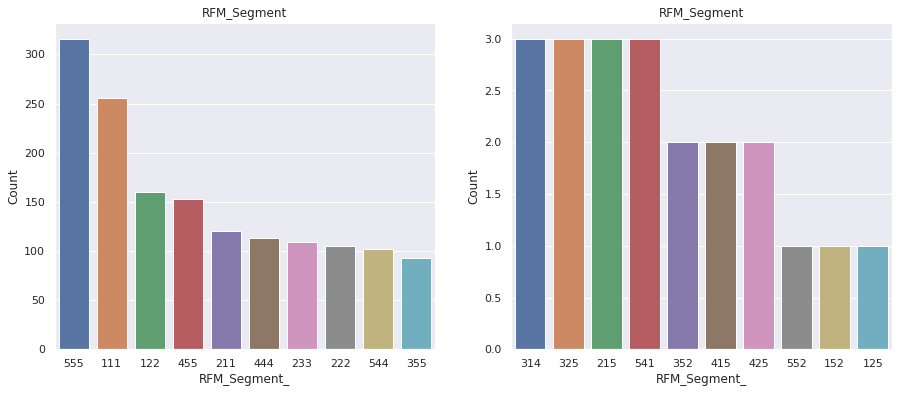

In [74]:
#visualize above data using barplot top most count
plt.figure(figsize=(15,6))
plt.subplot(1, 2, 1)
sns.barplot(x='RFM_Segment_',y='Count',data=rfm_segment_df.head(10))
plt.title('RFM_Segment')

#visualize using  barplot for lowest count
plt.subplot(1, 2, 2)
sns.barplot(x='RFM_Segment_',y='Count',data=rfm_segment_df.tail(10))
plt.title('RFM_Segment')

plt.show()

#### RFM Segment Categories: 5x5x5 (125 Unique Categorical Segments)
we can observe from above that there are all type of customers exists. 
* customers with 555 RMF_segment is very loyal(always choose this store for purchase),
* customer frequent buyer but spent low monetary value
*customer frequency of buying is less but spent high monetary value
* customers with one time purchase(purchase with high monetory value but never come back again). 

### Based on RFM_Score 

In [75]:
# using value count
rfm_score_df=rfm_df['RFM_Score'].value_counts().reset_index()
#reset index
rfm_score_df.rename(columns={'index': 'RFM_Score_'}, inplace=True)
#rename columns
rfm_score_df.rename(columns={'RFM_Score': 'Count'}, inplace=True)
# display 
rfm_score_df.sort_values(by="RFM_Score_",ascending=False)

,RFM_Score_,Count
9,15,316
10,14,289
7,13,329
8,12,319
6,11,338
5,10,349
3,9,372
4,8,365
1,7,381
0,6,385


Text(0.5, 1.0, 'RFM_Score_')

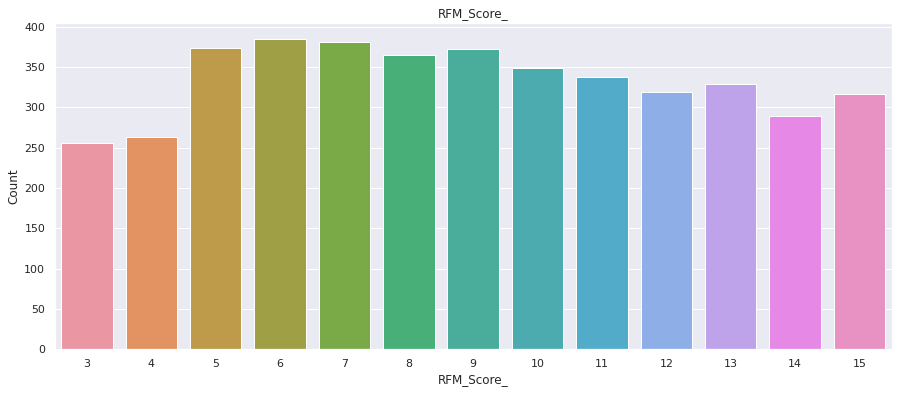

In [76]:
#plot the barplot
plt.figure(figsize=(15,6))
sns.barplot(x='RFM_Score_',y='Count',data=rfm_score_df)
plt.title('RFM_Score_')


we have observed that rfm_score varies from 3 (1+1+1)  to 15(5+5+5). we can observe in above plot average customer counts lies between 250-375 counts.

 So, we can use group by  function on  RFM_score  and check the mean values of recency, frequency, and monetary corresponding to each score. 

In [77]:
rfm_df.groupby("RFM_Score")[['Recency','Frequency', 'Monetary']].mean()

,Recency,Frequency,Monetary
RFM_Score,,,
3,277.304688,6.566406,132.888828
4,208.019011,11.216730,193.820076
5,184.056150,16.141711,286.658770
6,126.389610,19.776623,364.368805
7,103.076115,26.047244,901.366407
8,87.169863,36.158904,612.912137
9,70.005376,45.731183,857.355941
10,58.489971,61.160458,1088.394785
11,44.044379,80.849112,1929.192396


from this we can observe that

1. customer with high recency,low frequency,low monetary value are not loyal customer to this retail company. 

2. customers with low recency, high frequency and high average monetary value are loyal customer they never choose other retail company. company need to provide some loyality coupons,gift hampers to these customers. so, that these customers will not churn to other retailers.

3. customers with low recency, high frequency and  low average monetary value loyal customer but low spender 

 company need to little more concentrate customers lies between these two range. like Lucky winner coupns.. to impove customer recency and frequency.

this ideas used for manual clustring which is dine as below based on distribution of avrage value of recency,frequency and monetary.

In [78]:
#create a copy of rfm_df to create a manual clusting based on average value of recency, frequency and monetary
loyalty_based_customer=rfm_df.copy()

#for k mean clustring
krfm_df=rfm_df.copy()

#for  Hierarchical clustering
hrfm_df=rfm_df.copy()

#### manual segmentation:
lets group the customers into three group 4 groups as platinum, gold silver and bronze. buy using qcut method

In [79]:
#segmenting using qcut method
loyalty_based_customer['loyalt_batch_customers'] = pd.qcut(loyalty_based_customer['RFM_Score'], q=4,labels=["bronze_level","Silver_level","Gold_level","Platinum_level"])

Based on RFM_Score used qcut to segment the data into 4 segmnets. the segment with higher RFM_Score are named as Platinum (most loyal), glod,silver,and bronze.

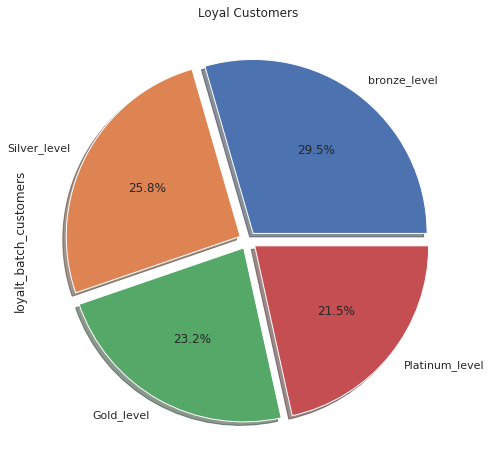

In [80]:
#using ie plot 
loyalty_based_customer["loyalt_batch_customers"].value_counts().plot.pie(figsize=(10,8),legend=False,autopct='%1.1f%%',shadow=True,explode=(0.05,0.05,0.05,0.05),title='Loyal Customers')


### we used pie plot see the percentage of customer belongs to each categories of manual clustering

### check the average value of recency, frequency, and monetary value

In [81]:
#groupby function to check  average of recency, frequency, and monetary value 
manual_clustring=loyalty_based_customer.groupby("loyalt_batch_customers")[['Recency','Frequency', 'Monetary']].mean()
manual_clustring

,Recency,Frequency,Monetary
loyalt_batch_customers,,,
bronze_level,190.294210,14.305164,260.161651
Silver_level,86.879249,35.898032,792.549142
Gold_level,45.846918,82.981113,1593.553062
Platinum_level,14.339400,266.916488,6333.749176


#**Model Building**

since the dataset doesnot include  labeled feature. So we will use unsupervised machine learing Algorithm 

1. K-mean clustering using elbow method
2.  K-mean clustering using silhouette_score
3. heirarchial clustering(Alggomerative clustering)

### **K-means Clustering** 
It is an iterative algorithm that divides the unlabeled dataset into k different clusters in such a way that each dataset belongs only one group that has similar properties.
The k-means clustering algorithm mainly performs two tasks:

Determines the best value for K center points or centroids by an iterative process.
Assigns each data point to its closest k-center. Those data points which are near to the particular k-center, create a cluster

It is a well-known clustering algorithm that is frequently used for unsupervised learning tasks.

we need to understand that the algorithm makes certain assumptions about the data.like,

1.The variables should be distributed symmetrically

2.Variables should have similar average values

3.Variables should have similar standard deviation values


### **Preprocessing the Data**

**The variables should be distributed symmetrically**

In [82]:
def visulize_features(data,features):

    '''Function takes dataframe and feature name  as input and gives
    statistical and visualization of feature using box and distplot'''

    #use describe to check data distributioon statistically
    print(data[features].describe())

    #visualize the  Frequency
    plt.figure(figsize=(15,6))
    plt.subplot(1, 2, 1)
    fig = sns.boxplot(y=data[features])
    fig.set_title(features)
    fig.set_ylabel(features)
    
    #distplot
    plt.subplot(1, 2, 2)
    fig = sns.distplot(data[features])
    #mean line
    plt.axvline(data[features].mean(), color='red', linestyle='dashed', linewidth=2)
    #median line
    plt.axvline(data[features].median(), color='blue', linestyle='dashed', linewidth=2)
    fig.set_title(features)
    fig.set_ylabel('count')
    fig.set_xlabel(features)

    plt.show()


count    4336.000000
mean       92.214483
std       100.199861
min         0.000000
25%        17.000000
50%        50.000000
75%       142.000000
max       373.000000
Name: Recency, dtype: float64


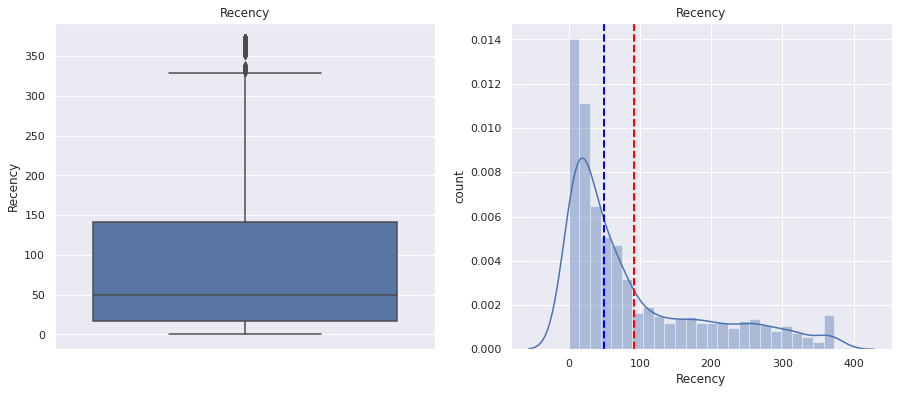

In [83]:
#visualize recency
visulize_features(rfm_df,"Recency")

The average recency of totalcustomers present is 92. and also 50% of customers who  returned with in 50 days.

we also observed that most of the customer who return 20- 150 days and there are customer who make one time purchase and never come back again.


count    4336.000000
mean       90.220249
std       224.695609
min         1.000000
25%        17.000000
50%        41.000000
75%        98.000000
max      7667.000000
Name: Frequency, dtype: float64


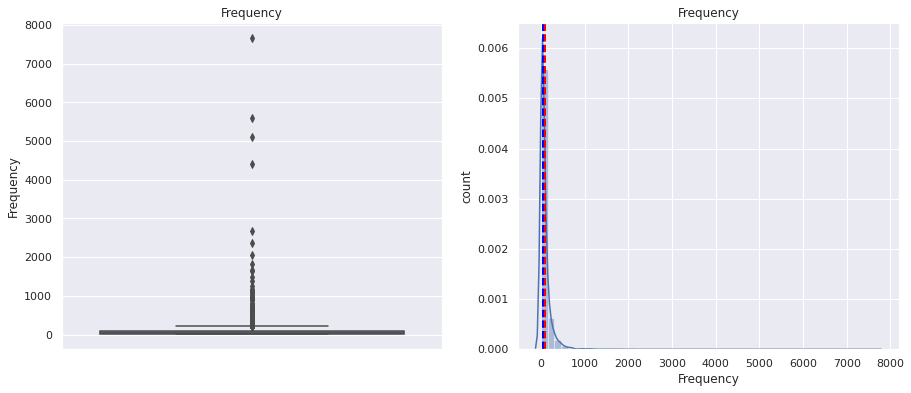

In [84]:
#visualize recency
visulize_features(rfm_df,"Frequency")

We can observe from above distribution that average purchase frequency of customer is 90. And 50% of customer whose purchanse frequency is between 1-41. but there are customers who make purchase items frequently.



count      4336.000000
mean       2015.081329
std        8901.730034
min           0.000000
25%         303.960000
50%         661.420000
75%        1631.327500
max      279138.020000
Name: Monetary, dtype: float64


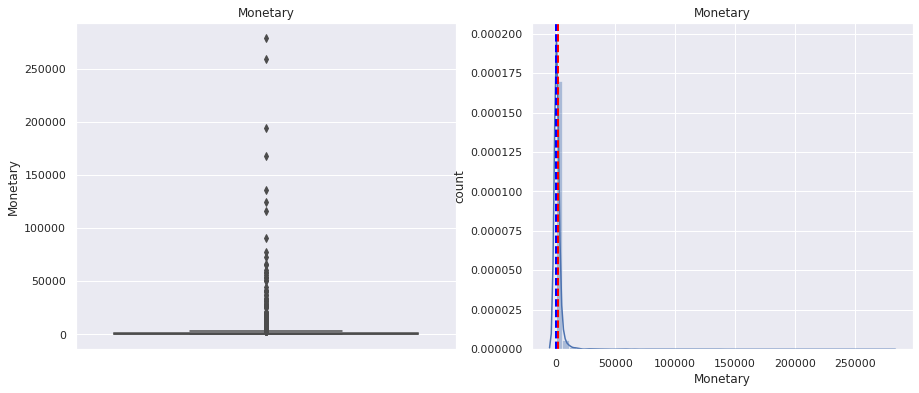

In [85]:
#visualize recency
visulize_features(rfm_df,"Monetary")

we can observe from above graph the average of total amount spent by customer   is 2015. The 50% of customer who spents below 661 and 25% of customer who spend above 1631.

As we seen earlier the recency,frequency and Monetary value are highly right skewed data .will use the Log transformation here. Since the log transformation cannot be used for negative values, we need to remove them, if they exist.

In [86]:
#Handle negative and zero values so as to handle infinite numbers during log transformation
def handle_neg_n_zero(num):
    if num <= 0:
        return 1
    else:
        return num

In [87]:
#Apply handle_neg_n_zero function to Recency and Monetary columns 
rfm_df['Recency'] = [handle_neg_n_zero(x) for x in rfm_df.Recency]
rfm_df['Monetary'] = [handle_neg_n_zero(x) for x in rfm_df.Monetary]
rfm_df['Frequency'] = [handle_neg_n_zero(x) for x in rfm_df.Frequency]

#Perform Log transformation to bring data into normal or near normal distribution
Log_Tfd_Data =rfm_df[['Recency', 'Frequency', 'Monetary']].apply(np.log, axis = 1).round(3) 

count    4336.000000
mean        3.737857
std         1.475553
min         0.000000
25%         2.833000
50%         3.912000
75%         4.956000
max         5.922000
Name: Recency, dtype: float64


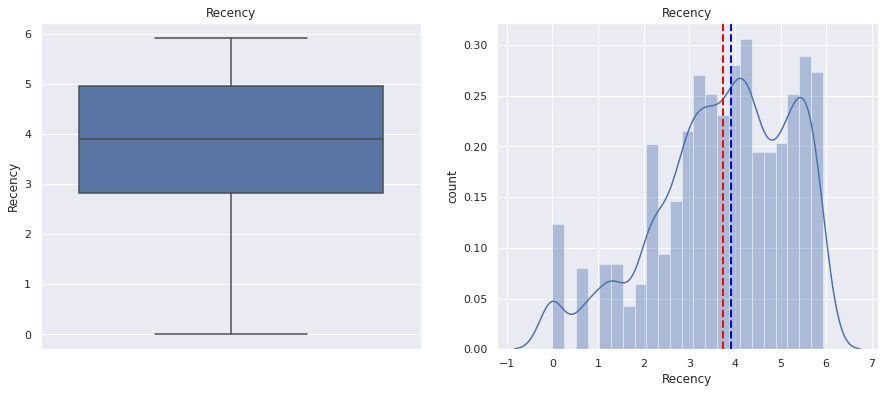

In [88]:
visulize_features(Log_Tfd_Data,"Recency")

count    4336.000000
mean        3.666377
std         1.323063
min         0.000000
25%         2.833000
50%         3.714000
75%         4.585000
max         8.945000
Name: Frequency, dtype: float64


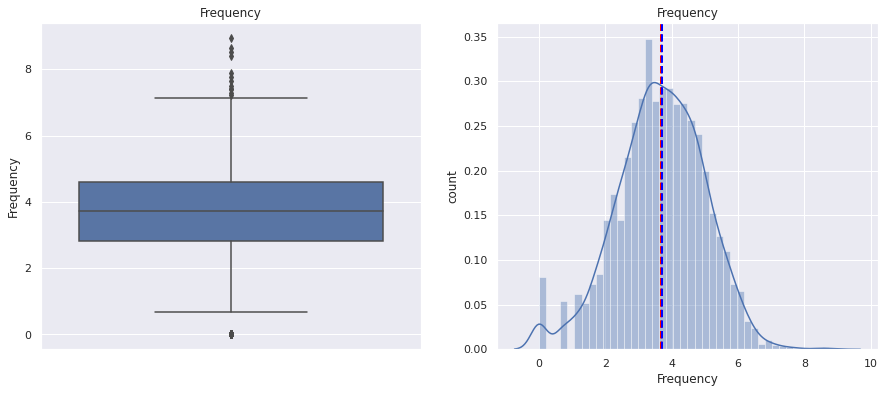

In [89]:
visulize_features(Log_Tfd_Data,"Frequency")

count    4336.000000
mean        6.570266
std         1.263331
min         0.000000
25%         5.717000
50%         6.494500
75%         7.397000
max        12.539000
Name: Monetary, dtype: float64


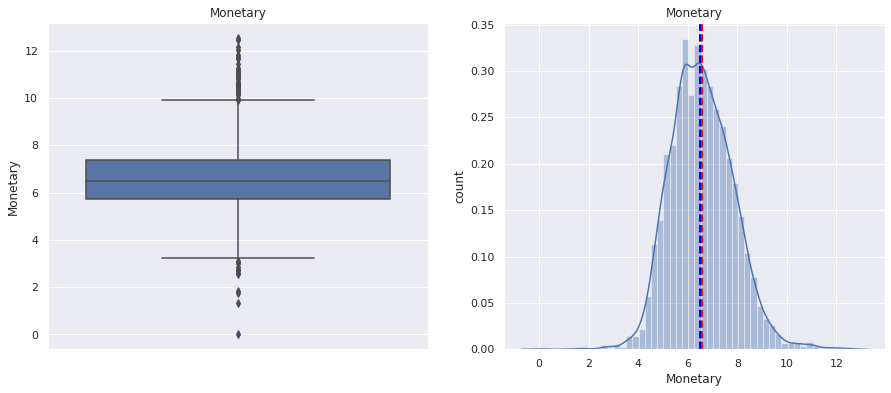

In [90]:
visulize_features(Log_Tfd_Data,"Monetary")

we can observe from above plots of Recency,Frequency, and monetory is normaly or symmetrically distributed after application of the log transformation.

So, we directly apply a log transformation on rfm_df

In [91]:
#applying log  function 
rfm_df['Recency_log'] = np.log(rfm_df['Recency'])
rfm_df['Frequency_log'] =np.log( rfm_df['Frequency'])
rfm_df['Monetary_log'] = np.log(rfm_df['Monetary'])

**Variables should have similar average values and standard deviation** 

In [92]:
features=['Recency_log',"Frequency_log",'Monetary_log']
X_features=rfm_df[features]
X_features.head()

,Recency_log,Frequency_log,Monetary_log
CustomerID,,,
12346,5.783825,0.000000,11.253942
12347,0.693147,5.204007,8.368693
12348,4.317488,3.295837,7.270480
12349,2.890372,4.276666,7.284512
12350,5.736572,2.772589,5.684939


**Standardization**:
Standardization is a scaling technique wherein it makes the data scale-free by converting the statistical distribution of the data into the below format:

mean - 0 (zero)
standard deviation - 1

Standardization is only applicable on the data values that follows Norm

In [93]:
#standardization of features
scaler_rec_mon=preprocessing.StandardScaler()
#fiting to preprocessing model
X_processed=scaler_rec_mon.fit_transform(X_features)
#processed data represented by X
X=X_processed

# K mean Model building 

In [94]:
X_new=rfm_df[["Recency","Frequency","Monetary"]]

#kmean clustering with k=2
kmeans = KMeans(n_clusters=2,random_state=1)
#fitting the dataset to kmean algorithm
kmeans.fit(X)
# Extract cluster labels from labels_ attribute
cluster_labels =kmeans.labels_

# Create a cluster label column in the original DataFrame
X_new['Cluster'] = cluster_labels

# Calculate average RFM values and size for each cluster
summary_k2 = X_new.groupby(['Cluster']).agg({'Recency': 'mean',
                                                    'Frequency': 'mean',
                                                    'Monetary': ['mean', 'count'],}).round(0)

summary_k2

Recency Frequency Monetary      
           mean      mean     mean count
Cluster                                 
0         141.0      25.0    461.0  2406
1          31.0     172.0   3953.0  1930

this includesonly two type of customer.
we need to use Elbow method to choose see the optimal value of the k.

### **Elbow method**

The Elbow method is one of the most popular ways to find the optimal number of clusters. This method uses the concept of WCSS value. WCSS stands for Within Cluster Sum of Squares, which defines the total variations within a cluster. The formula to calculate the value of WCSS (for 3 clusters) is given below:

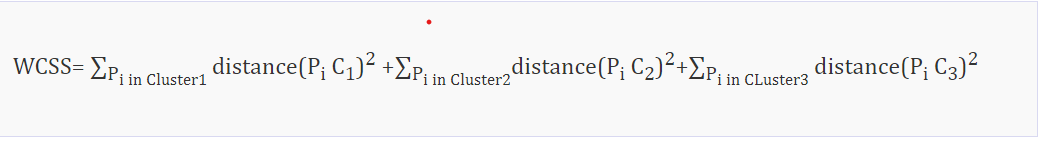

In [95]:
#creating dictionary and lsit to store values
sum_of_sq_dist = {}
km_scores = []

#iterating over a range 
for k in range(1,15):
    km = KMeans(n_clusters= k, init= 'k-means++', max_iter= 1000)
    #fitting the dataset to kmean algorithm
    km = km.fit(X)
    #storing inertia_ value of model for each k value in dictionary
    sum_of_sq_dist[k] = km.inertia_

    if k==1:
      # for k=1  there is no silhouette_score_  so assumed it as zero
      silhouette_score_=0
      km_scores.append(0)
    else:  
      #appending silhouette_score_ value to list
      silhouette_score_=silhouette_score(X, km.labels_)
      #appending labels_ to list
      km_scores.append(silhouette_score(X, km.labels_))
    print(f"Processing K-Means with k = {k}, Intertia = {km.inertia_},silhouette_score= {silhouette_score_}")

Processing K-Means with k = 1, Intertia = 13007.999999999996,silhouette_score= 0
Processing K-Means with k = 2, Intertia = 6898.2993801734065,silhouette_score= 0.39507940536637104
Processing K-Means with k = 3, Intertia = 5313.694417237913,silhouette_score= 0.3063517010583174
Processing K-Means with k = 4, Intertia = 4462.187761938427,silhouette_score= 0.30313407497234834
Processing K-Means with k = 5, Intertia = 3775.8015016168415,silhouette_score= 0.27965814043117626
Processing K-Means with k = 6, Intertia = 3376.355969793794,silhouette_score= 0.2799071475317188
Processing K-Means with k = 7, Intertia = 3053.7251840751233,silhouette_score= 0.2623307718302787
Processing K-Means with k = 8, Intertia = 2803.755357177797,silhouette_score= 0.2608593119039509
Processing K-Means with k = 9, Intertia = 2622.70603179472,silhouette_score= 0.2537432300918579
Processing K-Means with k = 10, Intertia = 2454.806040342723,silhouette_score= 0.26238063028200015
Processing K-Means with k = 11, Interti

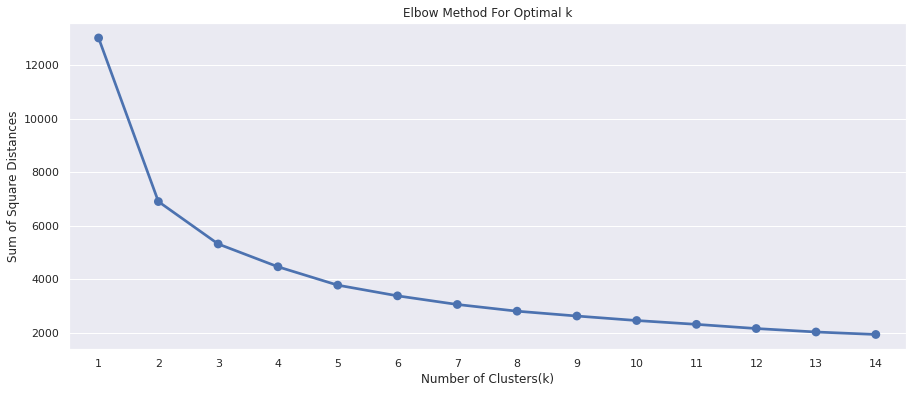

In [96]:
#Plot the graph for the sum of square distance values(km_inertias) and Number of Clusters
plt.figure(figsize=(15,6))
#Plot the graph for the sum of square distance values and Number of Clusters
sns.pointplot(x = list(sum_of_sq_dist.keys()), y = list(sum_of_sq_dist.values()))
plt.xlabel('Number of Clusters(k)')
plt.ylabel('Sum of Square Distances')
plt.title('Elbow Method For Optimal k')
plt.show()

we can observe from elbow curve the optimal value of k either 3 or 4 of k mean

we will take second opinion using Silhouette Coefficient:


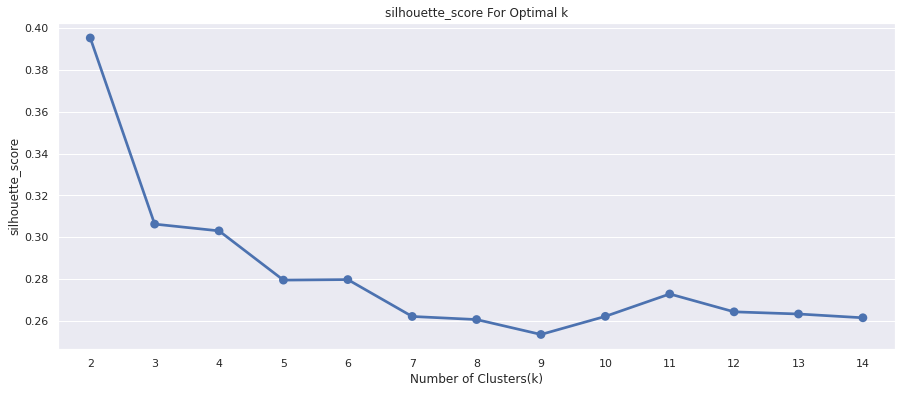

In [97]:
#Plot the graph for the silhouette_score and Number of Clusters
plt.figure(figsize=(15,6))
#Plot the graph for the sum of square distance values and Number of Clusters
sns.pointplot(x = list(sum_of_sq_dist.keys())[1:], y =km_scores[1:])
plt.xlabel('Number of Clusters(k)')
plt.ylabel('silhouette_score')
plt.title('silhouette_score For Optimal k')
plt.show()

based on silhouette_score and elbow method we can conclude that k=3 or 4  is optimal value. But still we will  campare how the average value of recency , frequency and monetary value change.

## we will analyze the clusters based on distribution average value of"Recency","Frequency","Monetary"

### Let create a kmean model with k=3

In [98]:
X_new=rfm_df[["Recency","Frequency","Monetary"]]

#kmean clustering with k=3
kmeans = KMeans(n_clusters=3,random_state=1)
#fitting the dataset to kmean algorithm
kmeans.fit(X)
# Extract cluster labels from labels_ attribute
cluster_labels =kmeans.labels_

# Create a cluster label column in the original DataFrame
X_new['Cluster'] = cluster_labels

# Calculate average RFM values and size for each cluster
summary_k3 = X_new.groupby(['Cluster']).agg({'Recency': 'mean',
                                                    'Frequency': 'mean',
                                                    'Monetary': ['mean', 'count'],}).round(0)

summary_k3

Recency Frequency Monetary      
           mean      mean     mean count
Cluster                                 
0          11.0     260.0   6501.0   931
1         167.0      15.0    288.0  1565
2          69.0      68.0   1214.0  1840

### Let create a kmean model with k=4

In [99]:
X_new=rfm_df[["Recency","Frequency","Monetary"]]
X_norm_new=rfm_df[['Recency_log', 'Frequency_log', 'Monetary_log']]

#kmean clustering with k=4
kmeans = KMeans(n_clusters=4,random_state=1)
#fitting the dataset to kmean algorithm
kmeans.fit(X)
# Extract cluster labels from labels_ attribute
cluster_labels =kmeans.labels_

# Create a cluster label column in the original DataFrame
X_new['Cluster'] = cluster_labels
X_norm_new['Cluster'] = cluster_labels

# Calculate average RFM values and size for each cluster
summary_k4 = X_new.groupby(['Cluster']).agg({'Recency': 'mean',
                                                    'Frequency': 'mean',
                                                    'Monetary': ['mean', 'count'],}).round(0)

summary_k4


Recency Frequency Monetary      
           mean      mean     mean count
Cluster                                 
0          20.0      37.0    570.0   820
1          11.0     285.0   7175.0   814
2          90.0      82.0   1537.0  1316
3         185.0      15.0    294.0  1386

### from this we can observe clearcut difference between clusters in summary_k4 

#So, we will conclude K=4 as optimal value 


# **Kmean clustering using silhoute method**  
**Silhouette Coefficient:**

Silhouette Coefficient or silhouette score is a metric used to calculate the goodness of a clustering technique. Its value ranges from -1 to 1.

1: Means clusters are well apart from each other and clearly distinguished.

0: Means clusters are indifferent, or we can say that the distance between clusters is not significant.

-1: Means clusters are assigned in the wrong way.

For n_clusters = 2 The average silhouette_score is : 0.39507940536637104
For n_clusters = 3 The average silhouette_score is : 0.30627733214522324
For n_clusters = 4 The average silhouette_score is : 0.30273239925245904
For n_clusters = 5 The average silhouette_score is : 0.2796434914126395
For n_clusters = 6 The average silhouette_score is : 0.2799071475317188
For n_clusters = 7 The average silhouette_score is : 0.26850439960218875


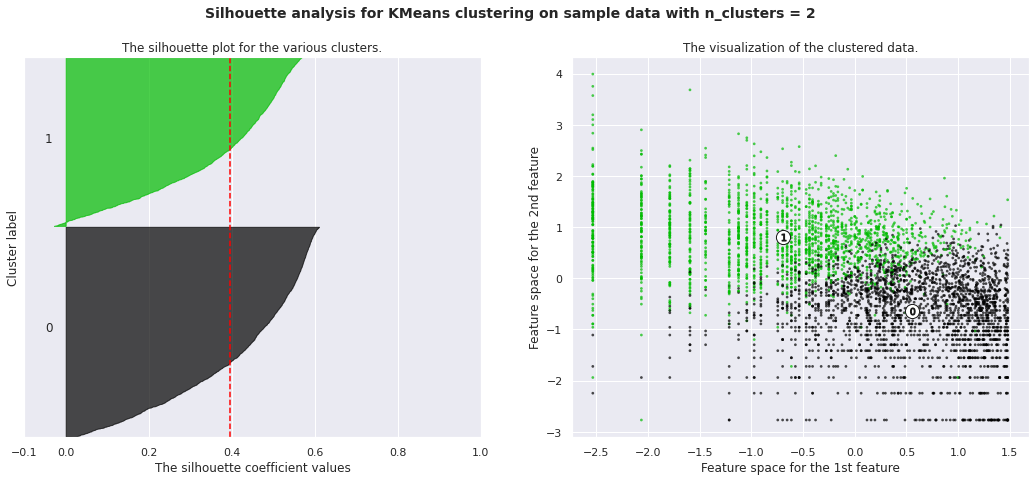

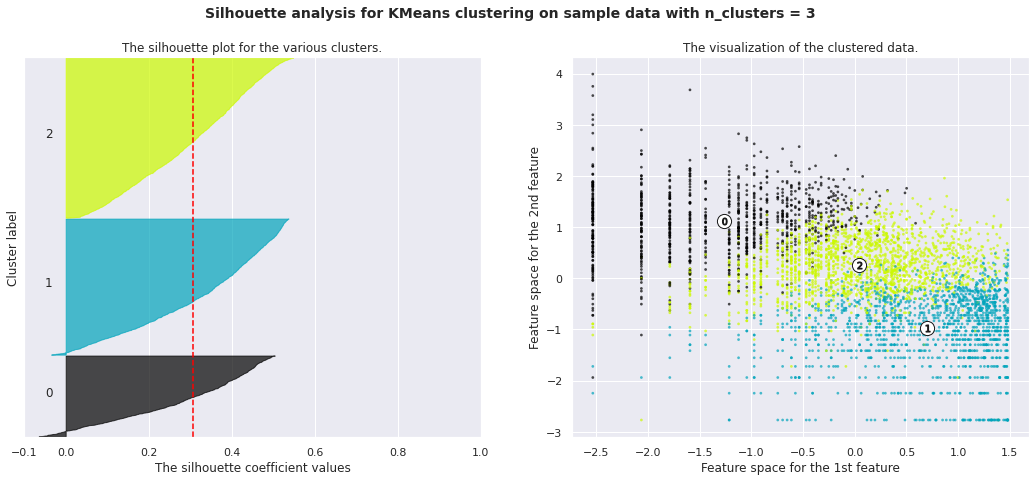

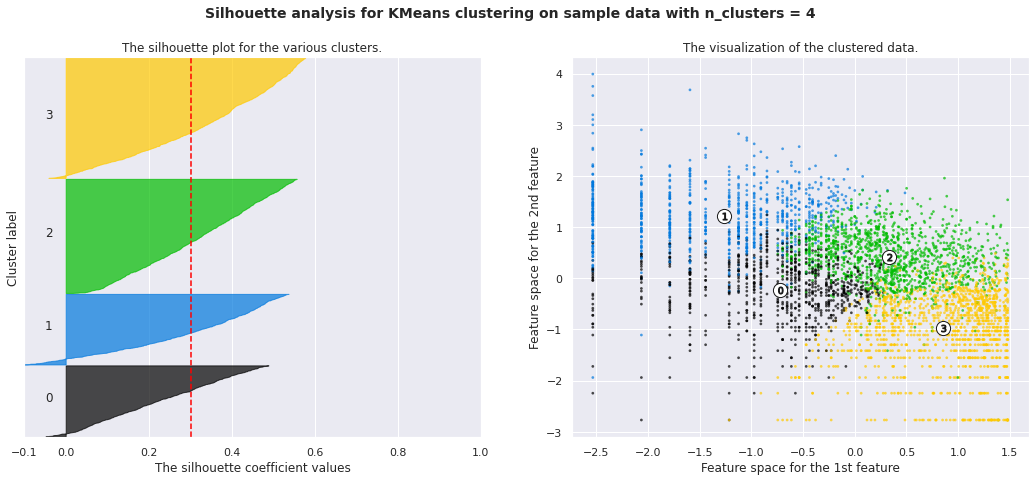

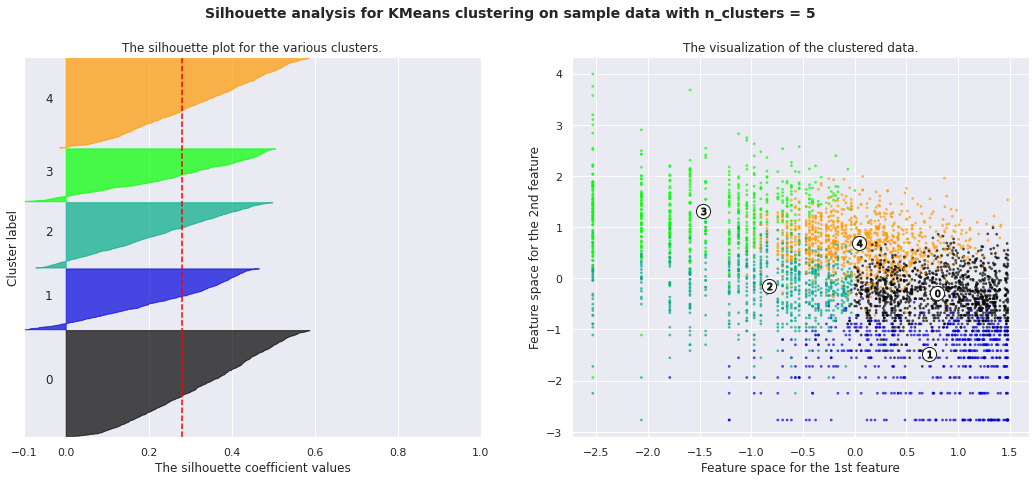

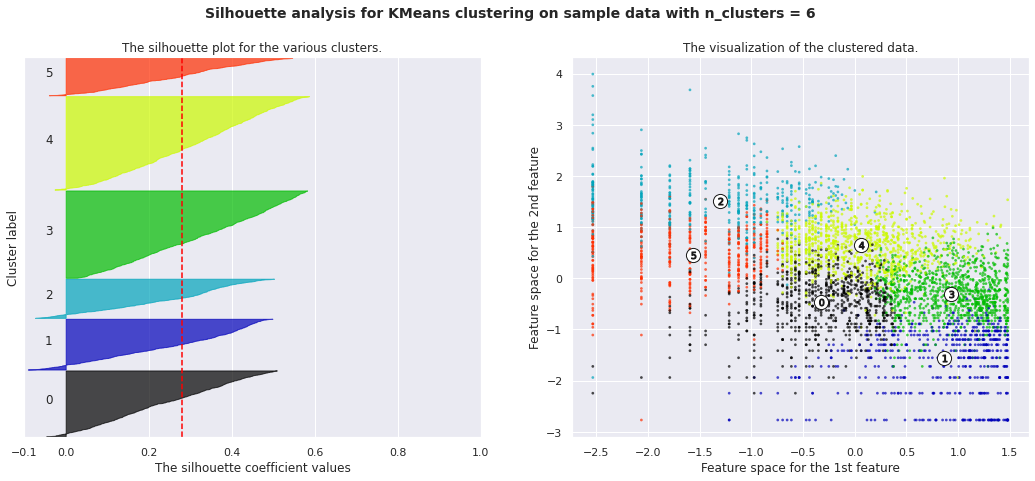

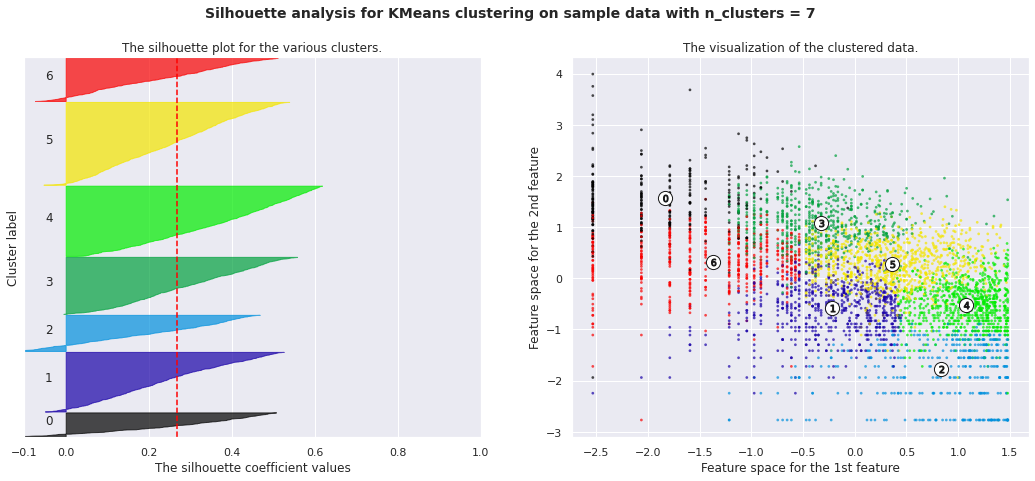

In [100]:
n_clusters_list = range(2,8,1)

for n_clusters in n_clusters_list:
    fig, (ax1, ax2) = plt.subplots(1, 2)
    fig.set_size_inches(18, 7)

    # The 1st subplot is the silhouette plot
    # The silhouette coefficient can range from -1, 1 but in this example all
    # lie within [-0.1, 1]
    ax1.set_xlim([-0.1, 1])
    # The (n_clusters+1)*10 is for inserting blank space between silhouette
    # plots of individual clusters, to demarcate them clearly.
    ax1.set_ylim([0, len(X) + (n_clusters + 1) * 10])

    # Initialize the clusterer with n_clusters value and a random generator
    # seed of 10 for reproducibility.
    clusterer = KMeans(n_clusters=n_clusters, random_state=1)
    cluster_labels = clusterer.fit_predict(X)

    # The silhouette_score gives the average value for all the samples.
    # This gives a perspective into the density and separation of the formed
    # clusters
    silhouette_avg = silhouette_score(X, cluster_labels)
    print("For n_clusters =", n_clusters,
          "The average silhouette_score is :", silhouette_avg)

    # Compute the silhouette scores for each sample
    sample_silhouette_values = silhouette_samples(X, cluster_labels)

    y_lower = 10
    for i in range(n_clusters):
        # Aggregate the silhouette scores for samples belonging to
        # cluster i, and sort them
        ith_cluster_silhouette_values = \
            sample_silhouette_values[cluster_labels == i]

        ith_cluster_silhouette_values.sort()

        size_cluster_i = ith_cluster_silhouette_values.shape[0]
        y_upper = y_lower + size_cluster_i

        color = cm.nipy_spectral(float(i) / n_clusters)
        ax1.fill_betweenx(np.arange(y_lower, y_upper),
                          0, ith_cluster_silhouette_values,
                          facecolor=color, edgecolor=color, alpha=0.7)

        # Label the silhouette plots with their cluster numbers at the middle
        ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))

        # Compute the new y_lower for next plot
        y_lower = y_upper + 10  # 10 for the 0 samples

    ax1.set_title("The silhouette plot for the various clusters.")
    ax1.set_xlabel("The silhouette coefficient values")
    ax1.set_ylabel("Cluster label")

    # The vertical line for average silhouette score of all the values
    ax1.axvline(x=silhouette_avg, color="red", linestyle="--")

    ax1.set_yticks([])  # Clear the yaxis labels / ticks
    ax1.set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])

    # 2nd Plot showing the actual clusters formed
    colors = cm.nipy_spectral(cluster_labels.astype(float) /n_clusters)
    ax2.scatter(X[:, 0], X[:, 1], marker='.', s=30, lw=0, alpha=0.7,
                c=colors, edgecolor='k')

    # Labeling the clusters
    centers = clusterer.cluster_centers_
    # Draw white circles at cluster centers
    ax2.scatter(centers[:, 0], centers[:, 1], marker='o',
                c="white", alpha=1, s=200, edgecolor='k')

    for i, c in enumerate(centers):
        ax2.scatter(c[0], c[1], marker='$%d$' % i, alpha=1,
                    s=50, edgecolor='k')

    ax2.set_title("The visualization of the clustered data.")
    ax2.set_xlabel("Feature space for the 1st feature")
    ax2.set_ylabel("Feature space for the 2nd feature")
    plt.suptitle(("Silhouette analysis for KMeans clustering on sample data "
                  "with n_clusters = %d" % n_clusters),
                 fontsize=14, fontweight='bold')

plt.show()

**finally we conclude that optimal value of clusters obtained is 4**


In [101]:

#Perform K-Mean Clustering or build the K-Means clustering model
KMean_clust = KMeans(n_clusters= 4, init= 'k-means++', max_iter= 1000,random_state=1)
KMean_clust.fit(X)

#Find the clusters for the observation given in the df
rfm_df['Cluster'] = KMean_clust.labels_
rfm_df.head(10)


,Recency,Frequency,Monetary,R,F,M,RFM_Segment,RFM_Score,Recency_log,Frequency_log,Monetary_log,Cluster
CustomerID,,,,,,,,,,,,
12346,325,1,77183.60,1,1,5,115,7,5.783825,0.000000,11.253942,2
12347,2,182,4310.00,5,5,5,555,15,0.693147,5.204007,8.368693,1
12348,75,27,1437.24,2,2,4,224,8,4.317488,3.295837,7.270480,2
12349,18,72,1457.55,4,4,4,444,12,2.890372,4.276666,7.284512,2
12350,310,16,294.40,1,2,2,122,5,5.736572,2.772589,5.684939,3
12352,36,77,1385.74,3,4,4,344,11,3.583519,4.343805,7.233990,2
12353,204,4,89.00,1,1,1,111,3,5.318120,1.386294,4.488636,3
12354,232,58,1079.40,1,4,4,144,9,5.446737,4.060443,6.984161,2
12355,214,13,459.40,1,1,2,112,4,5.365976,2.564949,6.129921,3


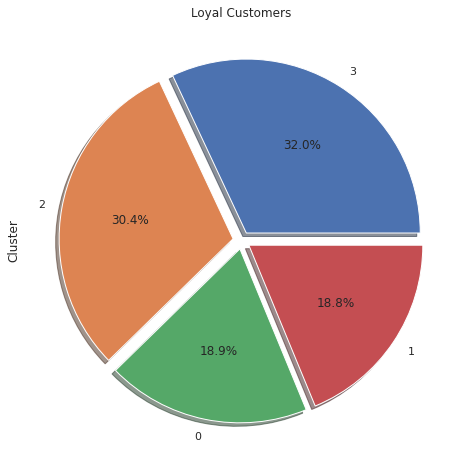

In [102]:
rfm_df["Cluster"].value_counts().plot.pie(figsize=(10,8),legend=False,autopct='%1.1f%%',shadow=True,explode=(0.05,0.05,0.05,0.05),title='Loyal Customers')

In [103]:
#aggregate over no of column using groupby function
rfm_df.groupby("Cluster").aggregate({"Cluster":"count",'Recency':'mean','Frequency':'mean',"Monetary":'mean'})

,Cluster,Recency,Frequency,Monetary
Cluster,,,,
0,820,19.706098,36.856098,569.676866
1,814,10.883292,285.095823,7174.515602
2,1316,90.446049,82.356383,1537.495419
3,1386,184.582973,14.808081,293.549019


By using kmean clustering obtained 4 category of customers we can name them as follow

1.  **Platinum Badge customer(cluster=1)**:  we name these type of customers as **Platinum Badge**.these customers are the best,they have following points.

        i.18.8% of customers (814customers)

        ii. Spends on average $7000  over a year

        iii. recency from last purchase 10-11 days

        iv. they are frequent visitors

        customers are less likely to churn



2.  **Gold Badge customer(cluster=2)**:we name these type of customers as **gold Badge**.these customers are the best,they have following points:


      i.30.4% of customers (1316 customers)
      ii.Spends on average $1500  over a year

      iii.recency 90 days from previous purchase

      iv.they are frequent visitors but less frequent in comparison with Platinum Badge customer.



3.  **Silver Badge customer(cluster=0)**:we name these type of customers as **silver Badge** they good customers but slow spender we can calll them as slow spender. we noted following points

        i.18.9% of customers(820 customers) belongs to this group

        ii. Spends on average $550-600  over a year

        iii recency before 20 days 

        iv.hey are less frequent visitors.

        we can call them **Discount Customers**   they will purchase only when there is discount


4.  **Bronze Badge customer(cluster=3)**:we name these type of customers as **Bronze Badge**

         i.32.0% of customers(1386 customers) belongs to this group

        ii. Spends on average $300  over a year

        iii.recency is6 month or one time purchaser

        iv.very  less frequent visitors.

        we can call them **Need-Based Customers**  



### **Hierarchial clustering**


Hierarchical Clustering creates clusters in a hierarchical tree-like structure (also called a Dendrogram). Meaning, a subset of similar data is created in a tree-like structure in which the root node corresponds to the entire data, and branches are created from the root node to form several clusters.

Hierarchical Clustering is of two types.
1. Divisive 
2. Agglomerative Hierarchical Clustering
* Divisive Hierarchical Clustering is also termed as a top-down clustering approach. In this technique, entire data or observation is assigned to a single cluster. The cluster is further split until there is one cluster for each data or observation. 

* Agglomerative Hierarchical Clustering is popularly known as a bottom-up approach, wherein each data or observation is treated as its cluster. A pair of clusters are combined until all clusters are merged into one big cluster that contains all the data.




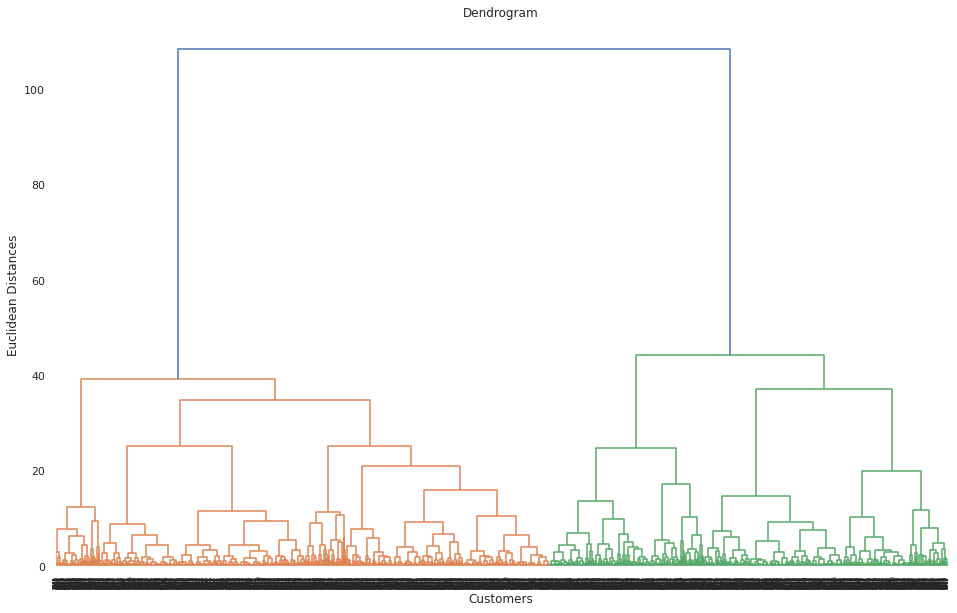

In [104]:
# Using the dendogram to find the optimal number of clusters

plt.figure(figsize=(16,10))
dendrogram = sch.dendrogram(sch.linkage(X, method = 'ward'))
plt.title('Dendrogram')
plt.xlabel('Customers')
plt.ylabel('Euclidean Distances')
plt.show() # find largest vertical distance we can make without crossing any other horizontal line    


####**The number of clusters will be the number of vertical lines which are being intersected by the line drawn using the threshold=39**

therefore no.of clusters equals to 4

In [105]:
# Fitting hierarchical clustering to the mall dataset

hc = AgglomerativeClustering(n_clusters = 4, affinity = 'euclidean', linkage = 'ward')
y_hc = hc.fit_predict(X)

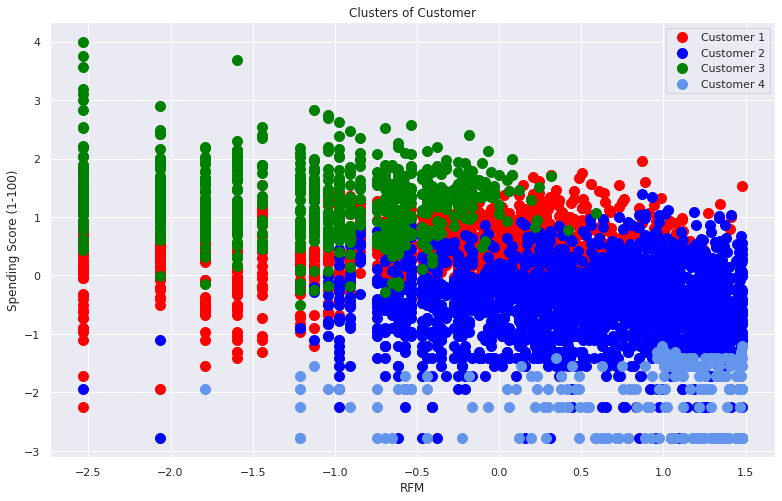

In [106]:
# Visualizing the clusters (two dimensions only)
plt.figure(figsize=(13,8))
plt.scatter(X[y_hc == 0, 0], X[y_hc == 0, 1], s = 100, c = 'red', label = 'Customer 1')
plt.scatter(X[y_hc == 1, 0], X[y_hc == 1, 1], s = 100, c = 'blue', label = 'Customer 2')
plt.scatter(X[y_hc == 2, 0], X[y_hc == 2, 1], s = 100, c = 'green', label = 'Customer 3')
plt.scatter(X[y_hc == 3, 0], X[y_hc == 3, 1], s = 100, c = 'cornflowerblue', label = 'Customer 4')
plt.title('Clusters of Customer')
plt.xlabel('RFM')

plt.ylabel('Spending Score (1-100)')
plt.legend()
plt.show()

In [107]:
# Specify the Column Names while initializing the Table 
myTable = PrettyTable(['SL No.',"Model_Name",'Data', "Optimal_Number_of_cluster"]) 
myTable.add_row(['1',"K-Means with Elbow method ", "RFM", "4"]) 
myTable.add_row(['2',"K-Means with silhouette_score ", "RFM", "4"])
myTable.add_row(['3',"Hierarchical clustering  ", "RFM", "4"])


In [108]:
print(myTable)

+--------+--------------------------------+------+---------------------------+
| SL No. |           Model_Name           | Data | Optimal_Number_of_cluster |
+--------+--------------------------------+------+---------------------------+
|   1    |   K-Means with Elbow method    | RFM  |             4             |
|   2    | K-Means with silhouette_score  | RFM  |             4             |
|   3    |   Hierarchical clustering      | RFM  |             4             |
+--------+--------------------------------+------+---------------------------+


## **Conclusion:**

Here we are to conclude our work and analysis on customer segmentation:From the analysis,we observed that data set belongs to retail store of UK focuses mainly on UK.Contribution of customers other countries towards purchase of items online reatil store is much less. Purchase of items are high during september,October,November, and December This may be due to eve time and also, most of the purchase has done one monday,tuesday,wednesday.

 we used RFM model to understand the recency,frequency and monetary value based on which we performed clustering using KMean Algorithm and Hierarchical clustering . we understood there should be 4 types of clusters we named them as Platinum , Gold, Silver and Bronze badge customers.
 where Platinum Badge customers are more loyal and Bronze badge customers are one time purchaser  or we can say that need based customers. 

 Kmean Algorithm has gave clear cut idea using Elbow and Silhoutle_score method.